/home/atsoskouno/miniforge3/envs/QF9/lib/python3.9/site-packages/joblib/parallel.py:1362: UserWarning: The backend class 'SequentialBackend' does not support timeout. You have set 'timeout=120' in Parallel but the 'timeout' parameter will not be used.
  warnings.warn(


price_Am - price_Eur: [[1.66e-06]
 [1.81e-06]
 [1.96e-06]
 [2.11e-06]
 [2.26e-06]
 [2.4e-06]
 [2.55e-06]
 [2.7e-06]
 [2.85e-06]
 [3e-06]
 [3.14e-06]
 [3.29e-06]
 [3.44e-06]
 [3.59e-06]
 [3.73e-06]
 [3.88e-06]
 [0.00653]
 [0.00732]
 [0.00801]
 [0.00859]
 [0.00904]
 [0.00938]
 [0.00962]
 [0.00977]
 [0.00983]
 [0.00981]
 [0.00972]
 [0.00957]
 [0.00937]
 [0.00911]
 [0.00882]
 [0.00848]
 [0.00811]
 [0.00771]
 [0.00726]
 [0.00676]
 [0.0062]
 [0.00559]
 [0.00496]
 [0.00429]
 [0.00362]
 [0.00299]
 [0.0024]
 [0.00188]
 [0.00143]
 [0.00107]
 [0.000784]
 [0.000574]
 [0.000425]
 [0.000341]
 [0.000292]
 [0.00029]
 [0.000296]
 [0.000327]
 [0.000348]
 [0.000377]
 [0.000387]
 [0.000394]
 [0.000384]
 [0.000369]
 [0.000342]
 [0.000313]
 [0.000278]
 [0.000243]
 [0.000208]
 [0.000176]
 [0.000146]
 [0.00012]
 [9.65e-05]
 [7.71e-05]
 [6.09e-05]
 [4.75e-05]
 [3.68e-05]
 [2.82e-05]
 [2.14e-05]
 [1.61e-05]
 [1.21e-05]
 [9.02e-06]
 [6.65e-06]
 [4.89e-06]
 [3.58e-06]
 [2.61e-06]
 [1.89e-06]
 [1.36e-06]
 [9.75e-0

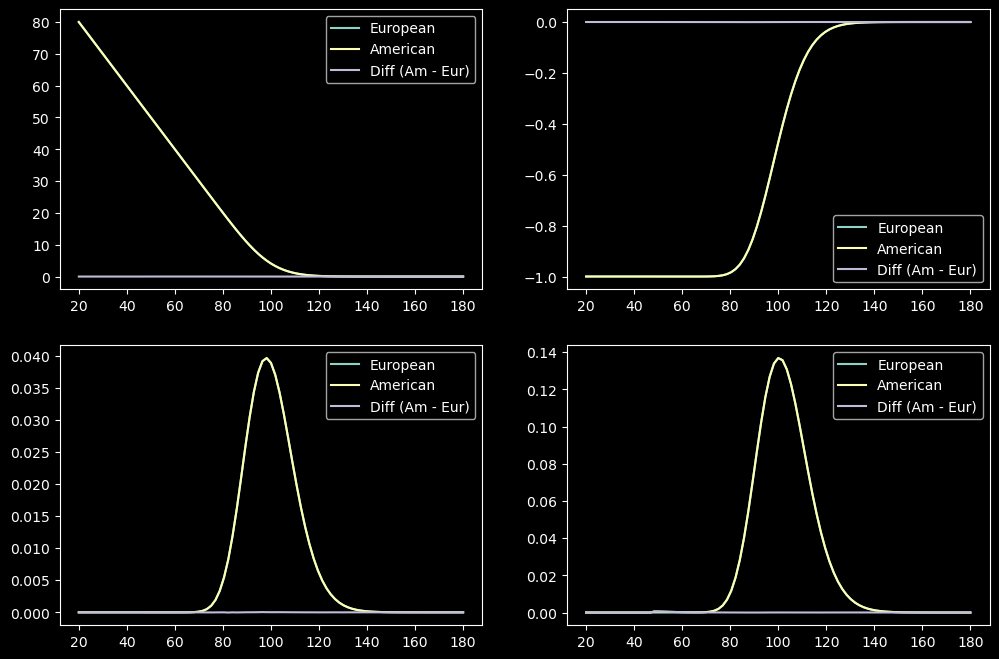

In [12]:
import importlib
import environment.utilsAlexander
importlib.reload(environment.utilsAlexander)
from environment.utilsAlexander import Utils
import matplotlib.pyplot as plt; plt.style.use('dark_background')
import numpy as np
# increase the cols and rows to display more data
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))

utils = Utils(
    # Liability Portfolio Parameters
    S0=100.0, K=100.0, init_ttm=60, r=0.00, q=0.00, spread=0.02,
    ttms=[60], poisson_rate=0.0, 
    
    # Hedging Portfolio Parameters
    hed_ttm=30, hed_type='European',

    # init_vol is for both GBM and Heston
    init_vol=0.3,
    # Heston, Model Parameters
    kappa=1, theta=0.09, volvol=0.1760, rho=-0.3021,
    
    # Simulation Parameters
    stochastic_process='Heston', time_to_simulate=30, num_sim=1024, frq=1,
    numerical_accuracy="high", n_jobs=1, np_seed=1235,

    # RL Environment Parameters
    action_low=0, action_high=3,
)

NUMBER_OF_ELEMENTS = 91

Ks, Ss, ivs, ttms = [], [], [], []

S = K = 100.
_Ss   = np.linspace(20, 180, NUMBER_OF_ELEMENTS)
_Ks   = np.linspace(20, 180, NUMBER_OF_ELEMENTS)
_ttms = np.logspace(np.log(1), np.log(60), NUMBER_OF_ELEMENTS, base=np.e)
_ttms = np.unique(np.append(np.array([-1., 0., 0.5]), _ttms))
_ttms = np.array([-1, 0., 0.5])
_ttms = np.array([30])

for S in _Ss:
    for ttm in _ttms:
        Ss.append(S); ttms.append(ttm); Ks.append(K); ivs.append(utils.init_vol)

Ks, ttms, Ss, ivs = np.array(Ks)[:, None], np.array(ttms)[:, None], np.array(Ss)[:, None], np.array(ivs)[:, None]



# price, delta, gamma, vega = utils.European_put_option(iv=ivs, ttms=ttms, S0=Ss, K=Ks, stochastic_process='GBM')
price_Eur, delta_Eur, gamma_Eur, vega_Eur = utils.European_put_option(iv=ivs, ttms=ttms, S0=Ss, K=Ks, stochastic_process='Heston')
# price, delta, gamma, vega = utils.American_put_option(iv=ivs, ttms=ttms, S0=Ss, K=Ks, stochastic_process='GBM')
price_Am, delta_Am, gamma_Am, vega_Am     = utils.American_put_option(iv=ivs, ttms=ttms, S0=Ss, K=Ks, stochastic_process='Heston')

# 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0,0].plot(Ss, price_Eur, label='European')
axs[0,0].plot(Ss, price_Am, label='American')
axs[0,0].plot(Ss, price_Am - price_Eur, label='Diff (Am - Eur)')
print(f'price_Am - price_Eur: {price_Am - price_Eur}')
axs[0,0].legend()

axs[0,1].plot(Ss, delta_Eur, label='European')
axs[0,1].plot(Ss, delta_Am, label='American')
axs[0,1].plot(Ss, delta_Am - delta_Eur, label='Diff (Am - Eur)')
axs[0,1].legend()

axs[1,0].plot(Ss, gamma_Eur, label='European')
axs[1,0].plot(Ss, gamma_Am, label='American')
axs[1,0].plot(Ss, gamma_Am - gamma_Eur, label='Diff (Am - Eur)')
axs[1,0].legend()

axs[1,1].plot(Ss, vega_Eur, label='European')
axs[1,1].plot(Ss, vega_Am, label='American')
axs[1,1].plot(Ss, vega_Am - vega_Eur, label='Diff (Am - Eur)')
axs[1,1].legend()

plt.show()

(Heston Simulation) Average Volatility at T: 0.2986283630648564


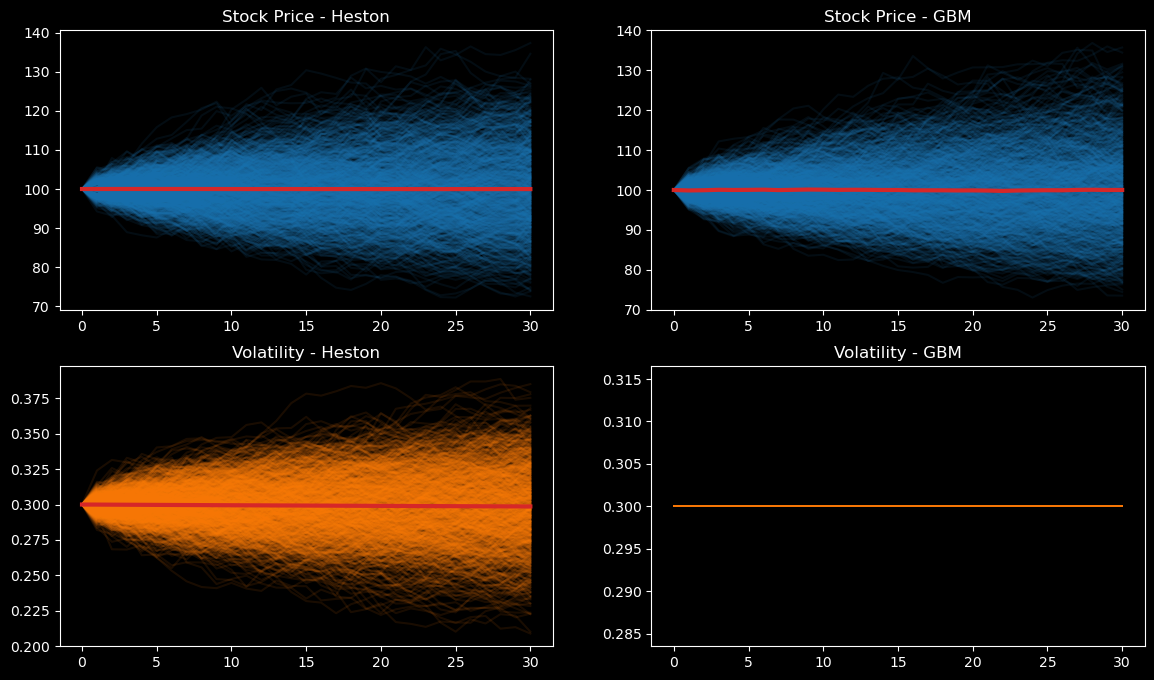

In [6]:
import importlib
import environment.utilsAlexander
importlib.reload(environment.utilsAlexander)
from environment.utilsAlexander import Utils
import matplotlib.pyplot as plt; plt.style.use('dark_background')
import numpy as np
# increase the cols and rows to display more data
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))

utils = Utils(
    # Liability Portfolio Parameters
    S0=100.0, K=100.0, init_ttm=60, r=0.00, q=0.00, spread=0.02,
    ttms=[60], poisson_rate=0.0, 
    
    # Hedging Portfolio Parameters
    hed_ttm=30, hed_type='European',

    # init_vol is for both GBM and Heston
    init_vol=0.3,
    # Heston, Model Parameters
    kappa=1, theta=0.09, volvol=0.1760, rho=-0.3021,
    
    # Simulation Parameters
    stochastic_process='Heston', time_to_simulate=30, num_sim=1024, frq=1,
    numerical_accuracy="low", n_jobs=1, np_seed=1235,

    # RL Environment Parameters
    action_low=0, action_high=3,
)


# Heston Simulation
S_array, V_array = utils.init_env()
x_array = np.arange(0, S_array.shape[1]).reshape(1, S_array.shape[1]).repeat(S_array.shape[0], axis=0)
print(f'(Heston Simulation) Average Volatility at T: {np.mean(V_array, axis=0)[-1]}')

# GBM Simulation
utils.stochastic_process = 'GBM'
S_array_G, V_array_G = utils.init_env()


fig, axs = plt.subplots(2, 2, figsize=(14, 8))
# Heston
axs[0,0].set_title('Stock Price - Heston')
axs[0,0].plot(x_array.T, S_array.T, label='Stock Price', color='tab:blue', alpha=.1)
axs[0,0].plot(x_array[0], np.mean(S_array, axis=0), label='Average Stock Price', color='tab:red', lw=3)

axs[1,0].set_title('Volatility - Heston')
axs[1,0].plot(x_array.T, V_array.T, label='Volatility', color='tab:orange', alpha=.1)
axs[1,0].plot(x_array[0], np.mean(V_array, axis=0), label='Average Volatility', color='tab:red', lw=3)

# GBM
axs[0,1].set_title('Stock Price - GBM')
axs[0,1].plot(x_array.T, S_array_G.T, label='Stock Price', color='tab:blue', alpha=.1)
axs[0,1].plot(x_array[0], np.mean(S_array_G, axis=0), label='Average Stock Price', color='tab:red', lw=3)

axs[1,1].set_title('Volatility - GBM')
axs[1,1].plot(x_array.T, V_array_G.T, label='Volatility', color='tab:orange', alpha=.1)
# axs[1,1].plot(x_array[0], np.mean(V_array_G, axis=0), label='Average Volatility', color='tab:red', lw=3)

plt.show()

----------------------------------------
# **Gamma and Vega as a function of time and moneyness**

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from scipy.stats import norm
from tqdm import tqdm
from scipy.stats import norm
import pandas as pd
from scipy.integrate import quad
from environment.TradingAlexander import Option, SyntheticOption
import numpy as np
random.seed(1)

# my imports
from numpy import sqrt, exp, pi, cos, sin, log, abs
from tqdm import tqdm, trange
from scipy.stats import qmc
from numba import njit
import QuantLib as ql
from joblib import Parallel, delayed
from scipy.integrate import quad
from functools import partial
from multiprocessing import cpu_count
import inspect
from functools import wraps
from typing import List

from functools import wraps
from typing import List
import pandas as pd
import numpy as np
from multiprocessing import cpu_count

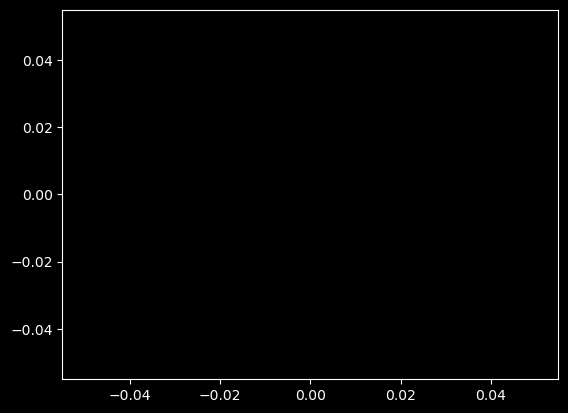

In [2]:
import importlib
import environment.utilsAlexander
importlib.reload(environment.utilsAlexander)
from environment.utilsAlexander import Utils
import matplotlib.pyplot as plt; plt.style.use('dark_background')
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

NUMBER_OF_ELEMENTS =  11 #50

#######################################################################################################################################
utils = Utils(
    # Liability Portfolio Parameters
    S0=100.0, K=100.0, init_ttm=0, r=0.00, q=0.00, spread=0.005,
    ttms=[60], poisson_rate=0.0, moneyness_mean = 1.0, moneyness_std = 0.0, #ttms=[30 ,60, 90, 120]
    
    # Contract Parameters
    num_conts_to_add = 1, contract_size = 100,

    # Hedging Portfolio Parameters
    hed_ttm=30, hed_type='European',

    # init_vol is for both GBM and Heston
    init_vol=0.3,
    # init_vol=0.0228,
    # Heston, Model Parameters
    kappa=10, theta=0.03, volvol=0.3, rho=-0.7,
    
    # Simulation Parameters
    stochastic_process='Heston', time_to_simulate=65, num_sim=32, frq=1,
    numerical_accuracy="low", n_jobs=-1, np_seed=1235,

    # RL Environment Parameters
    action_low=0, action_high=3,
)

## Custom pricing ################################################################################################################
# _S      = np.array([ 100.194063 ])[:, None] 
# _vol    = np.array([ 1.063494e-07 ])[:, None]
# _ttm    = np.array([ 4 ])[:, None]
# _K      = np.array([ 100 ])[:, None]

# _price, _delta, _gamma, _vega = utils.American_put_option(iv=_vol, ttms=_ttm, S0=_S, K=_K, stochastic_process='Heston')
# print(f'_price: {_price[0,0]}, _delta: {_delta[0,0]}, _gamma: {_gamma[0,0]}, _vega: {_vega[0,0]}')
# del _S, _vol, _ttm, _price, _delta, _gamma, _vega
#######################################################################################################################################

Ks, Ss, ivs, ttms = [], [], [], []
_Ss = np.linspace(99, 101, NUMBER_OF_ELEMENTS)
_Ss = np.linspace(90, 110, NUMBER_OF_ELEMENTS)
# _Ks = np.linspace(20, 180, NUMBER_OF_ELEMENTS)
_ttms = np.logspace(np.log(1), np.log(60), NUMBER_OF_ELEMENTS, base=np.e)
# _ttms = np.unique(np.append(np.array([-1., 0., 0.5]), _ttms))
# _ttms = np.array([-1, 0., 0.5])

# print(f'_ttms: {_ttms}')
for S in _Ss:
    for ttm in _ttms:
        Ss.append(S); ttms.append(ttm); Ks.append(100.); ivs.append(utils.init_vol)

Ks, ttms, Ss, ivs = np.array(Ks)[:, None], np.array(ttms)[:, None], np.array(Ss)[:, None], np.array(ivs)[:, None]
# print(f'ttms: {ttms}')
# price, delta, gamma, vega = utils.European_put_option(iv=ivs, ttms=ttms, S0=Ss, K=Ks, stochastic_process='GBM')
price, delta, gamma, vega = utils.European_put_option(iv=ivs, ttms=ttms, S0=Ss, K=Ks, stochastic_process='Heston')
# price, delta, gamma, vega = utils.American_put_option(iv=ivs, ttms=ttms, S0=Ss, K=Ks, stochastic_process='GBM')
# price, delta, gamma, vega = utils.American_put_option(iv=ivs, ttms=ttms, S0=Ss, K=Ks, stochastic_process='Heston')

plt.plot(Ss[ttms == 0], price[ttms == 0])
plt.show()
## Time the function #############################################################################################################

# %timeit utils.European_put_option(iv=ivs, ttms=ttms, S0=Ss, K=Ks, stochastic_process='Heston')

##################################################################################################################################

pio.renderers.default = 'notebook_connected'
num_S, num_ttm = len(_Ss), len(_ttms)
S_grid, ttm_grid = Ss.reshape(num_S, num_ttm), ttms.reshape(num_S, num_ttm)
price_grid, delta_grid = price.reshape(num_S, num_ttm), delta.reshape(num_S, num_ttm)
gamma_grid, vega_grid = gamma.reshape(num_S, num_ttm), vega.reshape(num_S, num_ttm)

##################################################################################################################################
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scene'}, {'type': 'scene'}]], subplot_titles=("Price", "Delta"))

fig.add_trace(go.Surface(x=S_grid, y=ttm_grid, z=price_grid, colorscale='Viridis', colorbar=dict(title='Price', x=0.45)), row=1, col=1)
fig.add_trace(go.Surface(x=S_grid, y=ttm_grid, z=delta_grid, colorscale='Cividis', colorbar=dict(title='Delta', x=1.0)), row=1, col=2)

fig.update_layout(title_text='Price and Delta as Functions of S and TTM', width=1400, height=700)
fig.update_scenes(dict(xaxis_title='S', yaxis_title='TTM', zaxis_title='Price', aspectratio=dict(x=1, y=1, z=0.7), 
                       camera=dict(eye=dict(x=1.5, y=1.5, z=.8))), row=1, col=1)
fig.update_scenes(dict(xaxis_title='S', yaxis_title='TTM', zaxis_title='Delta', aspectratio=dict(x=1, y=1, z=0.7), 
                       camera=dict(eye=dict(x=1.5, y=1.5, z=.8))), row=1, col=2)

fig.show()

##################################################################################################################################
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scene'}, {'type': 'scene'}]], subplot_titles=("Gamma", "Vega"))

fig.add_trace(go.Surface(x=S_grid, y=ttm_grid, z=gamma_grid, colorscale='Viridis', colorbar=dict(title='Gamma', x=0.45)), row=1, col=1)
fig.add_trace(go.Surface(x=S_grid, y=ttm_grid, z=vega_grid, colorscale='Cividis', colorbar=dict(title='Vega', x=1.0)), row=1, col=2)

fig.update_layout(title_text='Gamma and Vega as Functions of S and TTM', width=1400, height=700)
fig.update_scenes(dict(xaxis_title='S', yaxis_title='TTM', zaxis_title='Gamma', aspectratio=dict(x=1, y=1, z=0.7), 
                       camera=dict(eye=dict(x=1.5, y=1.5, z=.8))), row=1, col=1)
fig.update_scenes(dict(xaxis_title='S', yaxis_title='TTM', zaxis_title='Vega', aspectratio=dict(x=1, y=1, z=0.7), 
                       camera=dict(eye=dict(x=1.5, y=1.5, z=.8))), row=1, col=2)

fig.show()
##################################################################################################################################

---------------------------------
# **Hedging Simulation**
## Generate Option Data

In [125]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

import numpy as np

# Assume these modules are available in your environment
import environment.utilsAlexander
import environment.TradingAlexander
import environment.EnvironmentAlexander

# Reload the modules to incorporate any changes
importlib.reload(environment.utilsAlexander)
importlib.reload(environment.TradingAlexander)
importlib.reload(environment.EnvironmentAlexander)

# Re-import the specific classes or functions you need
from environment.utilsAlexander import Utils
from environment.EnvironmentAlexander import TradingEnv

# Step 1: Define a list to store StepResults
collected_results = []

# Step 2: Define a custom logging handler to capture StepResults
class StepResultHandler:
    def __init__(self, results_list):
        self.results_list = results_list
    
    def emit(self, record):
        # Assuming `record` is a dictionary representing StepResult
        self.results_list.append(record)

# Step 3: Define a custom logger with addHandler and write methods
class CustomLogger:
    def __init__(self):
        self.handlers = []
    
    def write(self, message):
        for handler in self.handlers:
            handler.emit(message)
    
    def addHandler(self, handler):
        self.handlers.append(handler)
    
    def removeHandler(self, handler):
        self.handlers.remove(handler)

# Step 4: Initialize the custom logger and add the StepResultHandler
logger = CustomLogger()
step_handler = StepResultHandler(collected_results)
logger.addHandler(step_handler)

########################################################################################################################
# Step 4: Initialize the Utilities
########################################################################################################################
utils = Utils(
    # Liability Portfolio Parameters
    S0=100.0, K=100.0, init_ttm=60, r=0.00, q=0.00, spread=0.01,
    ttms=[60], poisson_rate=0.0, moneyness_mean=1.0, moneyness_std=0.0,  # ttms=[30 ,60, 90, 120]
    
    # Contract Parameters
    num_conts_to_add=-1, contract_size=100,

    # Hedging Portfolio Parameters
    hed_ttm=90, hed_type='European',

    # init_vol is for both GBM and Heston
    init_vol=0.0228,
    # Heston, Model Parameters
    kappa=0.0807, theta=0.363, volvol=0.1760, rho=-0.3021,
    
    # Simulation Parameters
    stochastic_process='GBM', time_to_simulate=30, num_sim=512, frq=1,  # 2**14=16384
    numerical_accuracy="low", n_jobs=16, np_seed=1235,

    # RL Environment Parameters
    action_low=0, action_high=3,
)

########################################################################################################################
# Step 5: Initialize the Trading Environment
########################################################################################################################
## Load data from file
folder_name = "/Users/alexanderithakis/Documents/GitHub/gamma-vega-rl-hedging-X/(15:46 24|09|2024): [60] Test:Heston (128).70 H_Am" ; folder_path = "." ; load_data_from_file = True
## Load new Data
folder_name = "del" ; folder_path = "." ; load_data_from_file = False
env = TradingEnv(
    utils=utils, 
    logger=logger,  # Pass the custom logger here
    folder_name=folder_name, 
    folder_path=folder_path, 
    load_data_from_file=load_data_from_file
)

# Step 6: Sprea Earned on the Option
price_t_0 = env.portfolio.liab_port.options[0].price_path[0]
num_contract = env.portfolio.liab_port.options[0].num_contract
contract_size = env.portfolio.liab_port.options[0].contract_size
F0 = price_t_0 * num_contract * contract_size
SPREAD = F0 * env.utils.spread
print(f'F(0) = {F0}, Spread Earned on the Option: {SPREAD}')
# 1:34 - 9:49



Genrate Poisson arrival portfolio option prices and risk profiles


  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [00:07<00:00,  3.96it/s]


Initialize Poisson arrival liability portfolio options.


100%|██████████| 512/512 [00:00<00:00, 172115.38it/s]


Generate hedging portfolio option prices and risk profiles


100%|██████████| 31/31 [00:00<00:00, 479.26it/s]


Initialize hedging portfolio options.


100%|██████████| 512/512 [00:00<00:00, 15285.13it/s]

priced options: 15872
F(0) = -44.3276971578598, Spread Earned on the Option: -0.443276971578598



/home/atsoskouno/miniforge3/envs/QF9/lib/python3.9/site-packages/gym/spaces/box.py:84: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [126]:

########################################################################################################################
action = [.1]
########################################################################################################################
# Step 7: Iterate over all paths and time steps to collect StepResults
# print(f"Simulating {env.num_path} paths with {env.num_period} time steps each...")
num_paths = env.num_path
num_periods = env.num_period

for path in trange(num_paths, desc=f"Simulating {env.num_path} paths with {env.num_period} time steps each", unit="path"):
    state = env.reset()
    done = False
    while not done:
        # For this example, we'll take random actions. Replace with your policy as needed.
        ########################################################################################################################
        # action = env.action_space.sample()
        ########################################################################################################################
        next_state, reward, done, info = env.step(action)

# Step 8: Remove the custom handler to prevent duplicate logging
try: logger.removeHandler(step_handler)
except: pass

# Total Liability Portfolio value at T=0
print(f'Liability Value at T=0 {env.portfolio.liab_port.get_value(0)}')

# Optional: Convert collected_results to a DataFrame for analysis
df_results = pd.DataFrame(collected_results)
df_results.head()


Simulating 512 paths with 31 time steps each:   0%|          | 0/512 [00:00<?, ?path/s]

Liability Value at T=0 -44.3276971578598


episode  t  hed_action  hed_share  stock_price     vol  stock_position  \
0        1  0         0.1   0.122937   100.000000  0.0228      -43.664919   
1        1  1         0.1   0.110512   100.136949  0.0228      -33.724153   
2        1  2         0.1   0.096358   100.323023  0.0228      -23.545648   
3        1  3         0.1   0.074182   100.648402  0.0228      -12.085443   
4        1  4         0.1   0.079373   100.366661  0.0228      -14.032253   

   stock_pnl  liab_port_gamma  liab_port_vega  ...  liab_port_value  \
0  -5.979881       -35.993749      -19.441772  ...       -44.327697   
1  -6.275170       -35.905331      -19.292277  ...       -37.525222   
2  -7.661268       -34.851250      -18.030778  ...       -29.420871   
3   3.404970       -30.560517      -15.563723  ...       -18.477383   
4   6.478427       -34.881455      -17.721036  ...       -27.135453   

   hed_port_value  underlying_value  total_port_value  liab_port_delta  \
0        6.682600      -4366.491866      -4404.136963        49.778360   
1       11.857417      -3377.033801      -3402.701605        44.838989   
2       15.091888      -2362.170536      -2376.499519        38.183153   
3       14.790665      -1216.380548      -1220.067266        27.367023   
4       23.755490      -1408.370344      -1411.750306        36.475304   

   hed_port_delta  total_port_delta  total_port_gamma  total_port_vega  \
0       -6.113441               0.0        -32.394374       -16.510852   
1      -11.114836               0.0        -29.080432       -13.752231   
2      -14.637505               0.0        -25.309003       -10.303723   
3      -15.281579               0.0        -19.421297        -6.544353   
4      -22.443051               0.0        -20.838612        -6.490165   

   total_port_pnl  
0       -0.084827  
1       -0.251253  
2       -1.130072  
3       -0.659215  
4       -2.148642  

[5 rows x 37 columns]

SPRED        : -0.4433
Mean PnL at T: -0.6995 - Mean_Std : -3.3549 - VaR: -3.0875 - CVaR: -3.7799


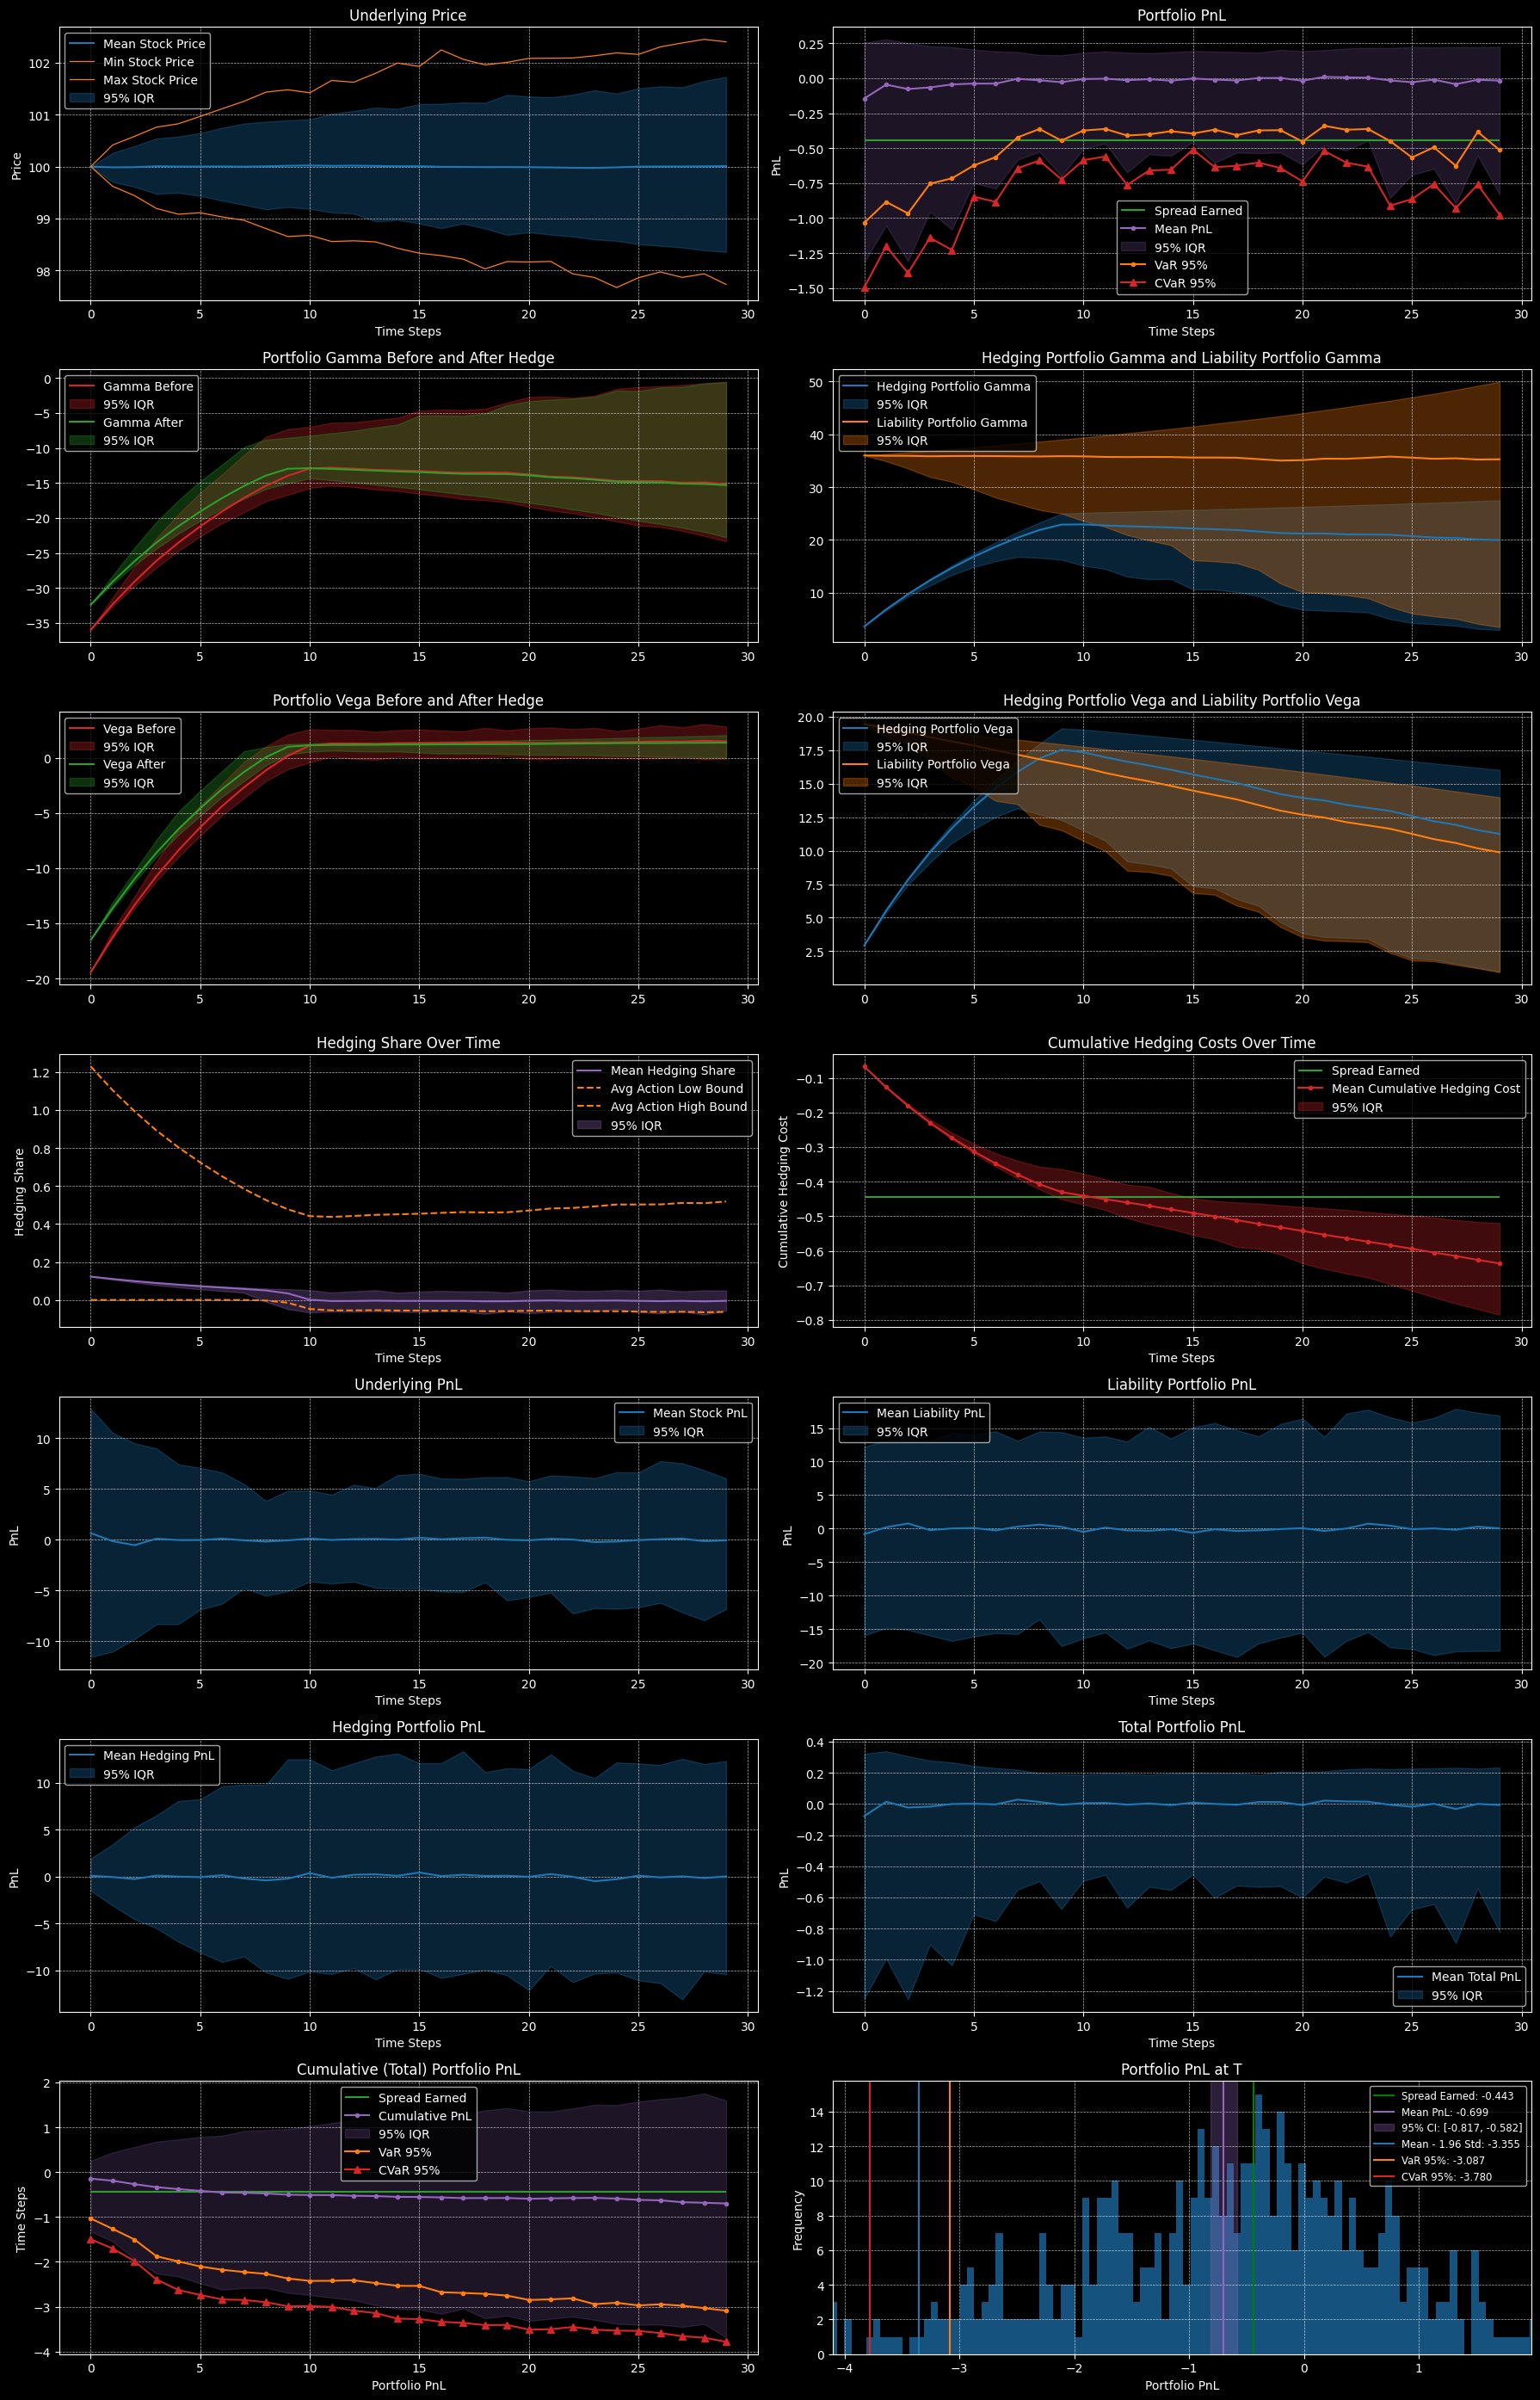

In [127]:
# df = pd.DataFrame([asdict(result) for result in collected_results])
df = df_results.copy()

# liability_maturity_index = df.query('t == @utils.init_ttm').index ; df.loc[liability_maturity_index, ['liab_port_pnl', 'step_pnl']] += F0 
# print(f'Added Price ({F0:.2f}) of Liability to {utils.init_ttm} time step')

# t0_index = df.query('t == 0').index ; df.loc[t0_index, ['liab_port_pnl', 'step_pnl']] += F0

# print(f'Headers: {pd.Series(df.columns.to_list())}')

# make a 3x2 sub plot
fig, axs = plt.subplots(7, 2, figsize=(18, 28))

# (Plot 1): Underlying ============================================================================================================================================================
mean_price = df.groupby('t')['stock_price'].mean()
min_prices = df.groupby('t')['stock_price'].min() ; max_prices = df.groupby('t')['stock_price'].max()
quantiles = df.groupby('t')['stock_price'].quantile([0.025, 0.975]).unstack(level=1)
axs[0, 0].plot(mean_price, label='Mean Stock Price', color='tab:blue')
axs[0, 0].plot(min_prices, label='Min Stock Price', color='tab:orange', linewidth=0.9)
axs[0, 0].plot(max_prices, label='Max Stock Price', color='tab:orange', linewidth=0.9)
axs[0, 0].fill_between(mean_price.index, quantiles[0.025], quantiles[0.975], alpha=0.3, label='95% IQR', color='tab:blue')
axs[0, 0].set_title('Underlying Price')
axs[0, 0].set_xlabel('Time Steps')
axs[0, 0].set_ylabel('Price')
axs[0, 0].legend() ; axs[0, 0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 2): Portfolio PnL ========================================================================================================================================================
df_pnl = df[['t', 'episode', 'step_pnl']].pivot(columns='t', index='episode', values='step_pnl')
mean_pnl = df_pnl.mean(axis=0)
quantiles = df_pnl.quantile([0.025, 0.975])#.unstack(level=1)

# plot the spread
axs[0, 1].hlines(-np.sign(utils.num_conts_to_add)*SPREAD, 0, df['t'].max(), color='tab:green', label='Spread Earned')
# plot the PnL
axs[0, 1].plot(mean_pnl, label='Mean PnL', color='tab:purple', marker='.')
axs[0, 1].fill_between(mean_pnl.index, quantiles.iloc[0,:], quantiles.iloc[1,:], alpha=0.2, label='95% IQR', color='tab:purple')
# plot the VaR_95 and CVaR_95
VaR_95 = df_pnl.quantile(0.05)
CVaR_95 = df_pnl[df_pnl < VaR_95].mean()
axs[0, 1].plot(VaR_95, label='VaR 95%', color='tab:orange', marker='.')
axs[0, 1].plot(CVaR_95, label='CVaR 95%', color='tab:red', marker='^')

axs[0, 1].set_title('Portfolio PnL')
axs[0, 1].set_xlabel('Time Steps') 
axs[0, 1].set_ylabel('PnL')
axs[0, 1].legend()
axs[0, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 3): Portfolio Gamma before and after hedge ============================================================================================================================
mean_gamma_before = df.groupby('t')['gamma_before_hedge'].mean()    
quantiles_before = df.groupby('t')['gamma_before_hedge'].quantile([0.025, 0.975]).unstack(level=1)
mean_gamma_after = df.groupby('t')['gamma_after_hedge'].mean()
quantiles_after = df.groupby('t')['gamma_after_hedge'].quantile([0.025, 0.975]).unstack(level=1)
axs[1, 0].plot(mean_gamma_before, label='Gamma Before', color='tab:red')
axs[1, 0].fill_between(mean_gamma_before.index, quantiles_before[0.025], quantiles_before[0.975], alpha=0.3, label='95% IQR', color='tab:red')
axs[1, 0].plot(mean_gamma_after, label='Gamma After', color='tab:green')
axs[1, 0].fill_between(mean_gamma_after.index, quantiles_after[0.025], quantiles_after[0.975], alpha=0.3, label='95% IQR', color='tab:green')
axs[1, 0].set_title('Portfolio Gamma Before and After Hedge')
axs[1, 0].legend(loc='upper left') ; axs[1, 0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 4): Heding Portfolio Gamma and Liability Porfolio Gamma ============================================================================================================================
mean_hed_gamma = df.groupby('t')['hed_port_gamma'].mean()
quantiles_hed_gamma = df.groupby('t')['hed_port_gamma'].quantile([0.025, 0.975]).unstack(level=1)
mean_liab_gamma = - df.groupby('t')['liab_port_gamma'].mean()
quantiles_liab_gamma = -df.groupby('t')['liab_port_gamma'].quantile([0.025, 0.975]).unstack(level=1)
axs[1, 1].plot(mean_hed_gamma, label='Hedging Portfolio Gamma', color='tab:blue')
axs[1, 1].fill_between(mean_hed_gamma.index, quantiles_hed_gamma[0.025], quantiles_hed_gamma[0.975], alpha=0.3, label='95% IQR', color='tab:blue')
axs[1, 1].plot(mean_liab_gamma, label='Liability Portfolio Gamma', color='tab:orange')
axs[1, 1].fill_between(mean_liab_gamma.index, quantiles_liab_gamma[0.025], quantiles_liab_gamma[0.975], alpha=0.3, label='95% IQR', color='tab:orange')
axs[1, 1].set_title('Hedging Portfolio Gamma and Liability Portfolio Gamma')
axs[1, 1].legend(loc='upper left') ; axs[1, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# # (Plot 5): Portfolio Vega before and after hedge ========================================================================================================================================
mean_vega_before = df.groupby('t')['vega_before_hedge'].mean()
quantiles_before = df.groupby('t')['vega_before_hedge'].quantile([0.025, 0.975]).unstack(level=1)
mean_vega_after = df.groupby('t')['vega_after_hedge'].mean()
quantiles_after = df.groupby('t')['vega_after_hedge'].quantile([0.025, 0.975]).unstack(level=1)
axs[2, 0].plot(mean_vega_before, label='Vega Before', color='tab:red')
axs[2, 0].fill_between(mean_vega_before.index, quantiles_before[0.025], quantiles_before[0.975], alpha=0.3, label='95% IQR', color='tab:red')
axs[2, 0].plot(mean_vega_after, label='Vega After', color='tab:green')
axs[2, 0].fill_between(mean_vega_after.index, quantiles_after[0.025], quantiles_after[0.975], alpha=0.3, label='95% IQR', color='tab:green')
axs[2, 0].set_title('Portfolio Vega Before and After Hedge')
axs[2, 0].legend(loc='upper left') ; axs[2, 0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 6): Heding Portfolio Vega and Liability Porfolio Vega ============================================================================================================================
mean_hed_vega = df.groupby('t')['hed_port_vega'].mean()
quantiles_hed_vega = df.groupby('t')['hed_port_vega'].quantile([0.025, 0.975]).unstack(level=1)
mean_liab_vega = - df.groupby('t')['liab_port_vega'].mean()
quantiles_liab_vega = -df.groupby('t')['liab_port_vega'].quantile([0.025, 0.975]).unstack(level=1)
axs[2, 1].plot(mean_hed_vega, label='Hedging Portfolio Vega', color='tab:blue')
axs[2, 1].fill_between(mean_hed_vega.index, quantiles_hed_vega[0.025], quantiles_hed_vega[0.975], alpha=0.3, label='95% IQR', color='tab:blue')
axs[2, 1].plot(mean_liab_vega, label='Liability Portfolio Vega', color='tab:orange')
axs[2, 1].fill_between(mean_liab_vega.index, quantiles_liab_vega[0.025], quantiles_liab_vega[0.975], alpha=0.3, label='95% IQR', color='tab:orange')
axs[2, 1].set_title('Hedging Portfolio Vega and Liability Portfolio Vega')
axs[2, 1].legend(loc='upper left') ; axs[2, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 7): Hedging Share Over Time ============================================================================================================================
mean_hed_action      = df.groupby('t')['hed_share'].mean()
mean_low_action_bnd  = df.groupby('t')['action_low'].mean()
mean_high_action_bnd = df.groupby('t')['action_high'].mean()
quantiles_hed_action = df.groupby('t')['hed_share'].quantile([0.025, 0.975]).unstack(level=1)

axs[3, 0].plot(mean_hed_action, label='Mean Hedging Share', color='tab:purple')
axs[3, 0].plot(mean_low_action_bnd, label='Avg Action Low Bound', color='tab:orange', linestyle='--')
axs[3, 0].plot(mean_high_action_bnd, label='Avg Action High Bound', color='tab:orange', linestyle='--')
axs[3, 0].fill_between(mean_hed_action.index, quantiles_hed_action[0.025], quantiles_hed_action[0.975], 
                      alpha=0.3, label='95% IQR', color='tab:purple')

axs[3, 0].set_title('Hedging Share Over Time')
axs[3, 0].set_xlabel('Time Steps')
axs[3, 0].set_ylabel('Hedging Share')
axs[3, 0].legend()
axs[3, 0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)



# (Plot 8): Cumulative Hedging Costs Over Time ============================================================================================================================
df_hed_cost = df.groupby(['episode', 't'])['hed_cost'].sum().unstack(level=0).cumsum()
axs[3, 1].hlines(-np.sign(utils.num_conts_to_add)*SPREAD, 0, df['t'].max(), color='tab:green', label='Spread Earned')

mean_hed_cost = df_hed_cost.mean(axis=1)
quantiles_hed_cost = df_hed_cost.quantile([0.025, 0.975], axis=1)
axs[3, 1].plot(mean_hed_cost, label='Mean Cumulative Hedging Cost', color='tab:red', marker='.')
axs[3, 1].fill_between(mean_hed_cost.index, quantiles_hed_cost.iloc[0, :], quantiles_hed_cost.iloc[1, :],
                       alpha=0.3, label='95% IQR', color='tab:red')
axs[3, 1].set_title('Cumulative Hedging Costs Over Time')
axs[3, 1].set_xlabel('Time Steps')
axs[3, 1].set_ylabel('Cumulative Hedging Cost')
axs[3, 1].legend()
axs[3, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 9): Underlying PnL  ============================================================================================================================
mean_stock_pnl = df.groupby('t')['stock_pnl'].mean()
quantiles_stock_pnl = df.groupby('t')['stock_pnl'].quantile([0.025, 0.975]).unstack(level=1)
axs[4, 0].plot(mean_stock_pnl, label='Mean Stock PnL', color='tab:blue')
axs[4, 0].fill_between(mean_stock_pnl.index, quantiles_stock_pnl[0.025], quantiles_stock_pnl[0.975], alpha=0.3, label='95% IQR', color='tab:blue')
axs[4, 0].set_title('Underlying PnL')
axs[4, 0].set_xlabel('Time Steps')
axs[4, 0].set_ylabel('PnL')
axs[4, 0].legend() ; axs[4, 0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 10): Liability Portfolio PnL  ============================================================================================================================
mean_liab_pnl = df.groupby('t')['liab_port_pnl'].mean()
quantiles_liab_pnl = df.groupby('t')['liab_port_pnl'].quantile([0.025, 0.975]).unstack(level=1)
axs[4, 1].plot(mean_liab_pnl, label='Mean Liability PnL', color='tab:blue')
axs[4, 1].fill_between(mean_liab_pnl.index, quantiles_liab_pnl[0.025], quantiles_liab_pnl[0.975], alpha=0.3, label='95% IQR', color='tab:blue')
axs[4, 1].set_title('Liability Portfolio PnL')
axs[4, 1].set_xlabel('Time Steps')
axs[4, 1].set_ylabel('PnL')
axs[4, 1].legend() ; axs[4, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 11): Hedging Portfolio PnL  ============================================================================================================================
mean_hed_pnl = df.groupby('t')['hed_port_pnl'].mean()
quantiles_hed_pnl = df.groupby('t')['hed_port_pnl'].quantile([0.025, 0.975]).unstack(level=1)
axs[5, 0].plot(mean_hed_pnl, label='Mean Hedging PnL', color='tab:blue')
axs[5, 0].fill_between(mean_hed_pnl.index, quantiles_hed_pnl[0.025], quantiles_hed_pnl[0.975], alpha=0.3, label='95% IQR', color='tab:blue')
axs[5, 0].set_title('Hedging Portfolio PnL')
axs[5, 0].set_xlabel('Time Steps')
axs[5, 0].set_ylabel('PnL')
axs[5, 0].legend() ; axs[5, 0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 12): Total Portfolio PnL  ============================================================================================================================
# manual addition 
df['total_pnl'] = df['liab_port_pnl'] + df['hed_port_pnl'] + df['stock_pnl']
# plot it 
mean_total_pnl = df.groupby('t')['total_pnl'].mean()
quantiles_total_pnl = df.groupby('t')['total_pnl'].quantile([0.025, 0.975]).unstack(level=1)
axs[5, 1].plot(mean_total_pnl, label='Mean Total PnL', color='tab:blue')
axs[5, 1].fill_between(mean_total_pnl.index, quantiles_total_pnl[0.025], quantiles_total_pnl[0.975], alpha=0.3, label='95% IQR', color='tab:blue')
axs[5, 1].set_title('Total Portfolio PnL')
axs[5, 1].set_xlabel('Time Steps')
axs[5, 1].set_ylabel('PnL')
axs[5, 1].legend() ; axs[5, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
# # Plot a Hline with the profit from the option.
# axs[5, 1].hlines(-np.sign(utils.num_conts_to_add) * SPREAD, 0, df['t'].max(), color='tab:green', label='Spread Earned')

# # Step PnL
# df_pnl = df[['t', 'episode', 'step_pnl']].pivot(columns='t', index='episode', values='step_pnl')
# mean_pnl = df_pnl.mean(axis=0)
# quantiles = df_pnl.quantile([0.025, 0.975])#.unstack(level=1)
# # Calculate VaR_95 and CVaR_95
# VaR_95 = df_pnl.quantile(0.05)
# CVaR_95 = df_pnl[df_pnl < VaR_95].mean()
# axs[5, 1].plot(mean_pnl, label='Mean PnL', color='tab:blue')
# axs[5, 1].fill_between(mean_pnl.index, quantiles.iloc[0,:],quantiles.iloc[1,:], alpha=0.3, label='95% IQR', color='tab:blue')
# axs[5, 1].plot(VaR_95, label='VaR 95%', color='tab:orange', marker='.')
# axs[5, 1].plot(CVaR_95, label='CVaR 95%', color='tab:red', marker='^')

# axs[5, 1].set_title('Portfolio PnL')
# axs[5, 1].set_xlabel('Time Steps')
# axs[5, 1].set_ylabel('PnL')
# axs[5, 1].legend() ; axs[5, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 13): Cumulative (Total) Portfolio PnL  ============================================================================================================================
# Cumulative PnL 
df_pnl = df[['t', 'episode', 'step_pnl']].pivot(columns='t', index='episode', values='step_pnl')
df_pnl_cum = df_pnl.cumsum(axis=1)
mean_pnl_cum = df_pnl_cum.mean(axis=0)
quantiles_cum = df_pnl_cum.quantile([0.025, 0.975])#.unstack(level=1)

# plot the spread
axs[6, 0].hlines(-np.sign(utils.num_conts_to_add)*SPREAD, 0, df['t'].max(), color='tab:green', label='Spread Earned')
# plot the cumulative PnL
axs[6, 0].plot(mean_pnl_cum, label='Cumulative PnL', color='tab:purple', marker='.')
axs[6, 0].fill_between(mean_pnl_cum.index, quantiles_cum.iloc[0,:],quantiles_cum.iloc[1,:], alpha=0.2, label='95% IQR', color='tab:purple')
# plot the VaR_95 and CVaR_95
VaR_95 = df_pnl_cum.quantile(0.05)
CVaR_95 = df_pnl_cum[df_pnl_cum < VaR_95].mean()
axs[6, 0].plot(VaR_95, label='VaR 95%', color='tab:orange', marker='.')
axs[6, 0].plot(CVaR_95, label='CVaR 95%', color='tab:red', marker='^')

axs[6, 0].set_title('Cumulative (Total) Portfolio PnL')
axs[6, 0].set_xlabel('Portfolio PnL') 
axs[6, 0].set_ylabel('Time Steps')
axs[6, 0].legend()
axs[6, 0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# (Plot 14): Portfolio PnL at T (Histogram) ============================================================================================================================
df_pnl_T = df.groupby('episode')['step_pnl'].sum()
axs[6, 1].hist(df_pnl_T, bins=128, color='tab:blue', alpha=0.7)

# Calculate statistics
Mean = df_pnl_T.mean()
Std = df_pnl_T.std()
Mean_Std = Mean - 1.96 * df_pnl_T.std()
n = len(df_pnl_T)
ci_lower, ci_upper = Mean - 1.96 * (Std / np.sqrt(n)), Mean + 1.96 * (Std / np.sqrt(n))
VaR_95 = df_pnl_T.quantile(0.05)
CVaR_95 = df_pnl_T[df_pnl_T < VaR_95].mean()
spread_value = -np.sign(utils.num_conts_to_add) * SPREAD

# Plot vertical lines
axs[6, 1].set_ylim(0, axs[6, 1].get_ylim()[1])
axs[6, 1].axvline(spread_value, color='green', label=f'Spread Earned: {spread_value:.3f}')
axs[6, 1].axvline(Mean, color='tab:purple', label=f'Mean PnL: {Mean:.3f}')
axs[6, 1].fill_betweenx(y=[0, axs[6, 1].get_ylim()[1]], x1=ci_lower, x2=ci_upper, color='tab:purple', alpha=0.3, label=f'95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]')
axs[6, 1].axvline(Mean_Std, color='tab:blue', label=f'Mean - 1.96 Std: {Mean - 1.96 * Std:.3f}')
axs[6, 1].axvline(VaR_95, color='tab:orange', label=f'VaR 95%: {VaR_95:.3f}')
axs[6, 1].axvline(CVaR_95, color='tab:red', label=f'CVaR 95%: {CVaR_95:.3f}')

# Finalize plot
axs[6, 1].legend(loc='upper right', fontsize='small')
axs[6, 1].set_title('Portfolio PnL at T')
axs[6, 1].set_xlabel('Portfolio PnL')
axs[6, 1].set_ylabel('Frequency')
axs[6, 1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
axs[6, 1].set_xlim(df_pnl_T.quantile(0.01), df_pnl_T.quantile(0.99))

# ============================================================================================================================

print(f'SPRED        : {SPREAD:.4f}')
print(f"Mean PnL at T: {Mean:.4f} - Mean_Std : {Mean_Std:.4f} - VaR: {VaR_95:.4f} - CVaR: {CVaR_95:.4f}")

plt.tight_layout()
plt.show()

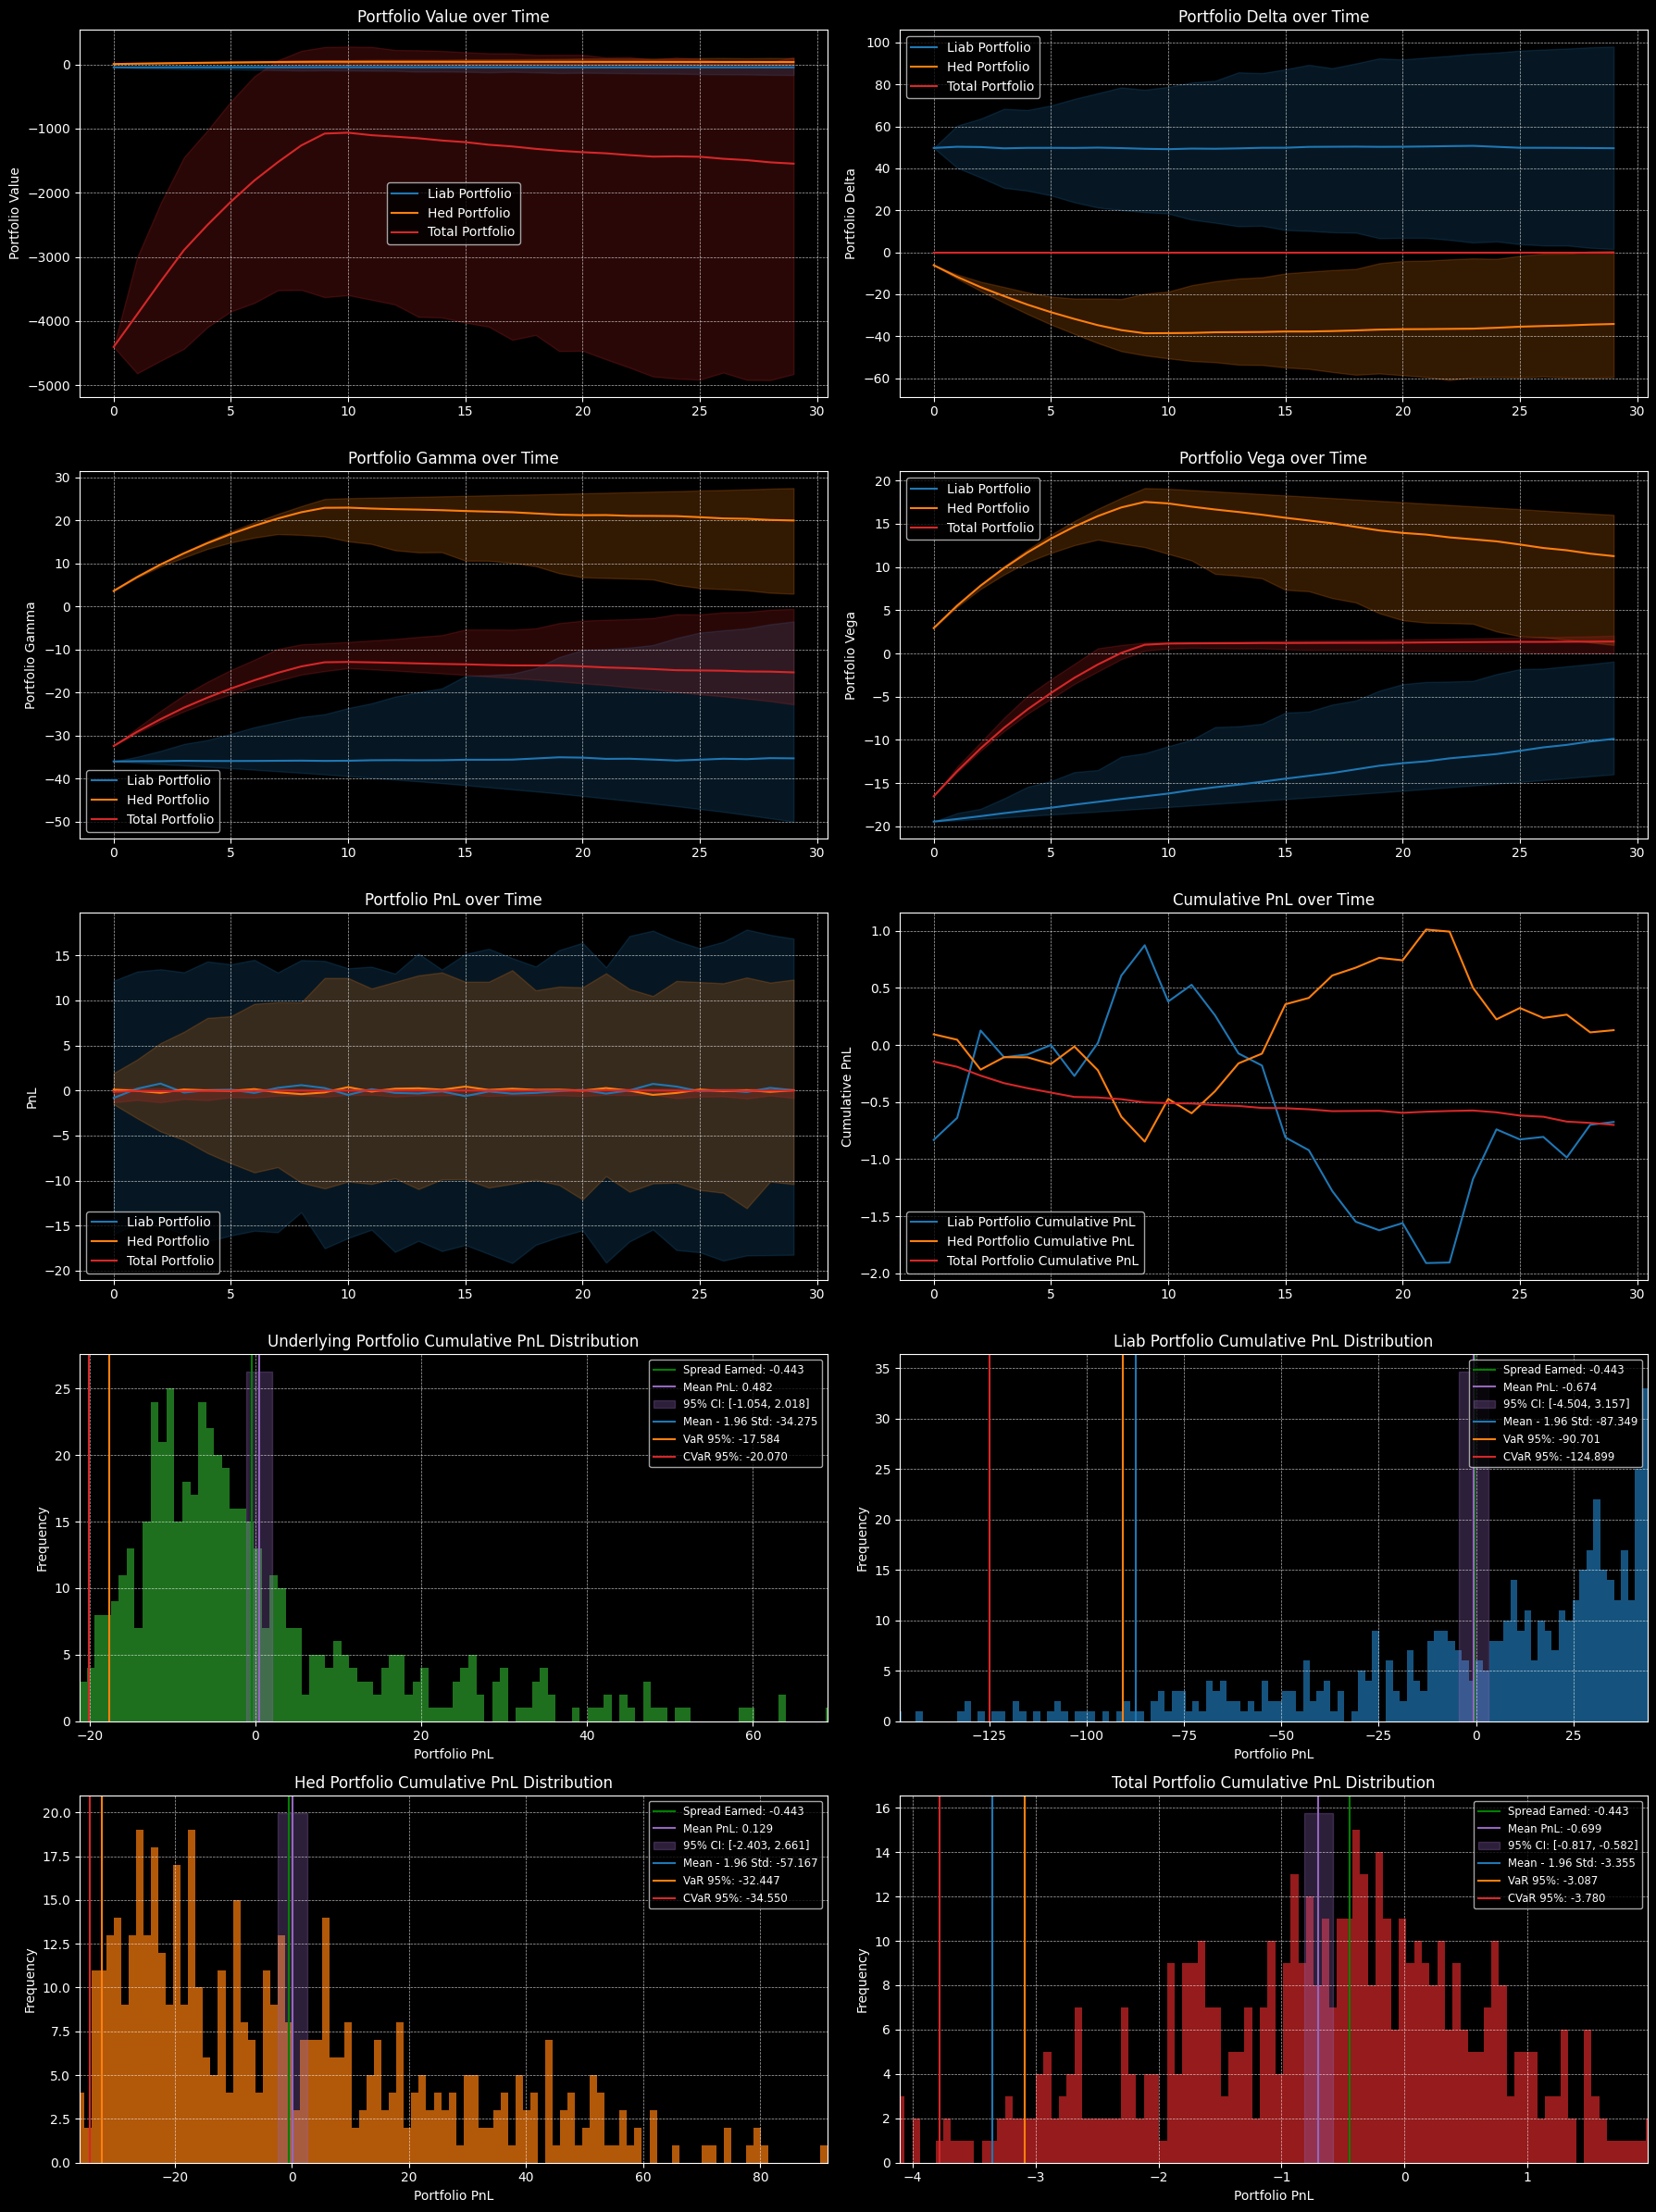

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Assuming numpy is already imported in your environment
from dataclasses import asdict

# Assuming collected_results is already defined and contains the necessary data
# df = pd.DataFrame([asdict(result) for result in collected_results])

# Define portfolios and metrics
portfolios = ['liab', 'hed', 'total']
underlying_portfolio = 'underlying'  # Define the underlying separately
metrics = {
    'port_value': 'Portfolio Value',
    'port_delta': 'Portfolio Delta',
    'port_gamma': 'Portfolio Gamma',
    'port_vega': 'Portfolio Vega',
    'port_pnl': 'Portfolio PnL',
    'cumulative_pnl': 'Cumulative PnL'
}

# Initialize dictionaries to store mean and quantiles
mean = {}
quantiles = {}
cumulative_pnl = {}

# Calculate Mean and Quantiles for each metric and portfolio
for metric, label in metrics.items():
    if metric == 'cumulative_pnl':
        for port in portfolios:
            key = f'{port}_pnl'
            cumulative_pnl[key] = df.groupby('t')[f'{port}_port_pnl'].mean().cumsum()
    else:
        for port in portfolios:
            key = f'{port}_{metric}'
            mean[key] = df.groupby('t')[f'{port}_port_{metric.split("_")[1]}'].mean()
            quantiles[key] = df.groupby('t')[f'{port}_port_{metric.split("_")[1]}'].quantile([0.025, 0.975]).unstack(level=1)

# Create Subplots (5 rows x 2 columns)
# The first 3 rows are for the original plots, and the last 2 rows are for the new histograms
fig, axs = plt.subplots(5, 2, figsize=(18, 24), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1]}, sharex=False)
fig.subplots_adjust(hspace=0.4)

# Define plot configurations for the first 3x2 plots
plot_configs = {
    0: ('port_value', 'Portfolio Value over Time', 'Portfolio Value'),
    1: ('port_delta', 'Portfolio Delta over Time', 'Portfolio Delta'),
    2: ('port_gamma', 'Portfolio Gamma over Time', 'Portfolio Gamma'),
    3: ('port_vega', 'Portfolio Vega over Time', 'Portfolio Vega'),
    4: ('port_pnl', 'Portfolio PnL over Time', 'PnL'),
    5: ('cumulative_pnl', 'Cumulative PnL over Time', 'Cumulative PnL')
}

# Plot each metric in the corresponding subplot
for idx, (metric_key, title, ylabel) in plot_configs.items():
    row, col = divmod(idx, 2)
    ax = axs[row, col]
    
    if metric_key != 'cumulative_pnl':
        # Plot for each portfolio
        for port in portfolios:
            key = f'{port}_{metric_key}'
            color = 'tab:blue' if port == 'liab' else 'tab:orange' if port == 'hed' else 'tab:red'
            ax.plot(mean[key], label=f'{port.capitalize()} Portfolio', color=color)
            ax.fill_between(mean[key].index, quantiles[key][0.025], quantiles[key][0.975],
                            color=color, alpha=0.2)
    else:
        # Plot cumulative PnL for each portfolio
        for port in portfolios:
            key = f'{port}_pnl'
            color = 'tab:blue' if port == 'liab' else 'tab:orange' if port == 'hed' else 'tab:red'
            ax.plot(cumulative_pnl[key], label=f'{port.capitalize()} Portfolio Cumulative PnL', color=color)
    
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# --- Adding Cumulative PnL Distribution Histograms Below ---

# Define the new plot indices for the histograms (rows 3 and 4, both columns)
hist_plot_indices = [(3, 0), (3, 1), (4, 0), (4, 1)]
hist_portfolios = ['underlying', 'liab', 'hed', 'total']
hist_colors = {
    'underlying': 'tab:green',
    'liab': 'tab:blue',
    'hed': 'tab:orange',
    'total': 'tab:red'
}

# Calculate and plot the cumulative PnL distributions
for ax, port in zip([axs[idx[0], idx[1]] for idx in hist_plot_indices], hist_portfolios):
    if port == 'underlying':
        pnl = df.groupby('episode')['stock_pnl'].sum()
    elif port == 'liab':
        pnl = df.groupby('episode')['liab_port_pnl'].sum()
    elif port == 'hed':
        pnl = df.groupby('episode')['hed_port_pnl'].sum()
    else:  # 'total'
        pnl = df.groupby('episode')['step_pnl'].sum()
    
    # Plot histogram
    ax.hist(pnl, bins=128, color=hist_colors[port], alpha=0.7)
    
    # Calculate statistics
    Mean = pnl.mean()
    Std = pnl.std()
    n = len(pnl)
    ci_lower, ci_upper = Mean - 1.96 * (Std / np.sqrt(n)), Mean + 1.96 * (Std / np.sqrt(n))
    VaR_95 = pnl.quantile(0.05)
    CVaR_95 = pnl[pnl < VaR_95].mean()
    
    # Assuming `utils.num_conts_to_add` and `SPREAD` are defined in your environment
    # If not, please define them accordingly
    try:
        spread_value = -np.sign(utils.num_conts_to_add) * SPREAD
        ax.axvline(spread_value, color='green', label=f'Spread Earned: {spread_value:.3f}')
    except NameError:
        # If utils.num_conts_to_add or SPREAD is not defined, skip spread line
        pass
    
    # Plot vertical lines and fill between for CI
    ax.axvline(Mean, color='tab:purple', label=f'Mean PnL: {Mean:.3f}')
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=ci_lower, x2=ci_upper, 
                     color='tab:purple', alpha=0.3, label=f'95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]')
    ax.axvline(Mean - 1.96 * Std, color='tab:blue', label=f'Mean - 1.96 Std: {Mean - 1.96 * Std:.3f}')
    ax.axvline(VaR_95, color='tab:orange', label=f'VaR 95%: {VaR_95:.3f}')
    ax.axvline(CVaR_95, color='tab:red', label=f'CVaR 95%: {CVaR_95:.3f}')
    
    # Finalize histogram plot
    ax.legend(loc='upper right', fontsize='small')
    ax.set_title(f'{port.capitalize()} Portfolio Cumulative PnL Distribution')
    ax.set_xlabel('Portfolio PnL')
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.set_xlim(pnl.quantile(0.01), pnl.quantile(0.99))

# Set common xlabel for all subplots if necessary
# Adjust layout for better spacing
plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'liab_port_value'}>,
        <Axes: title={'center': 'hed_port_value'}>],
       [<Axes: title={'center': 'liab_port_pnl'}>,
        <Axes: title={'center': 'hed_port_pnl'}>]], dtype=object)

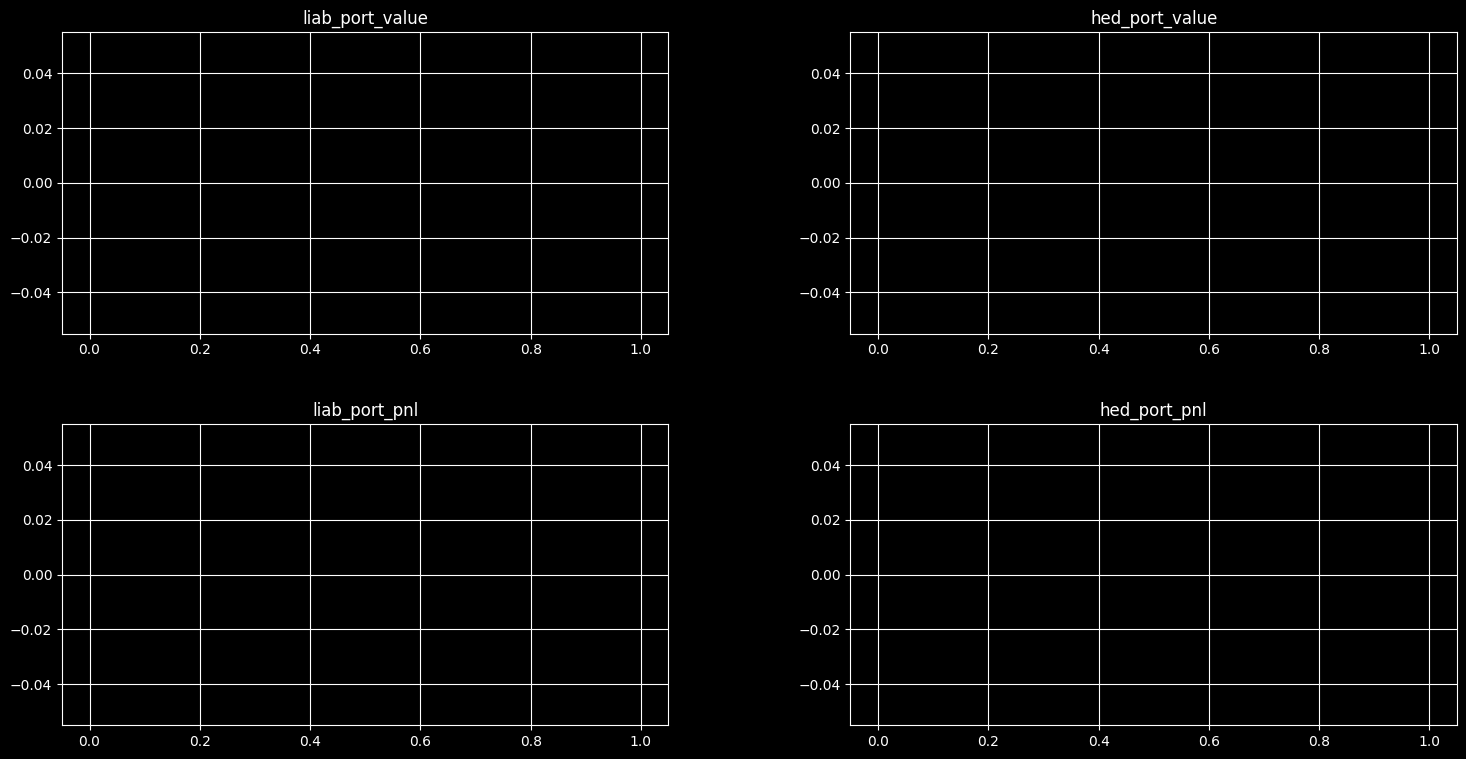

In [129]:
df.query('t == 59')[['liab_port_value', 'hed_port_value', 'liab_port_pnl', 'hed_port_pnl']].hist(figsize=(18, 9), bins=32)

----------------------------------------
# **(Binomial Trees) Numercial Results for Binomial Trees for American Options**

BSM Put Price       : 7.965567, Delta: -0.460172, Gamma: 0.019848, Vega: 0.3969525474770118
American Put Price  : 7.963576, Delta: -0.460182, Gamma: 0.019862


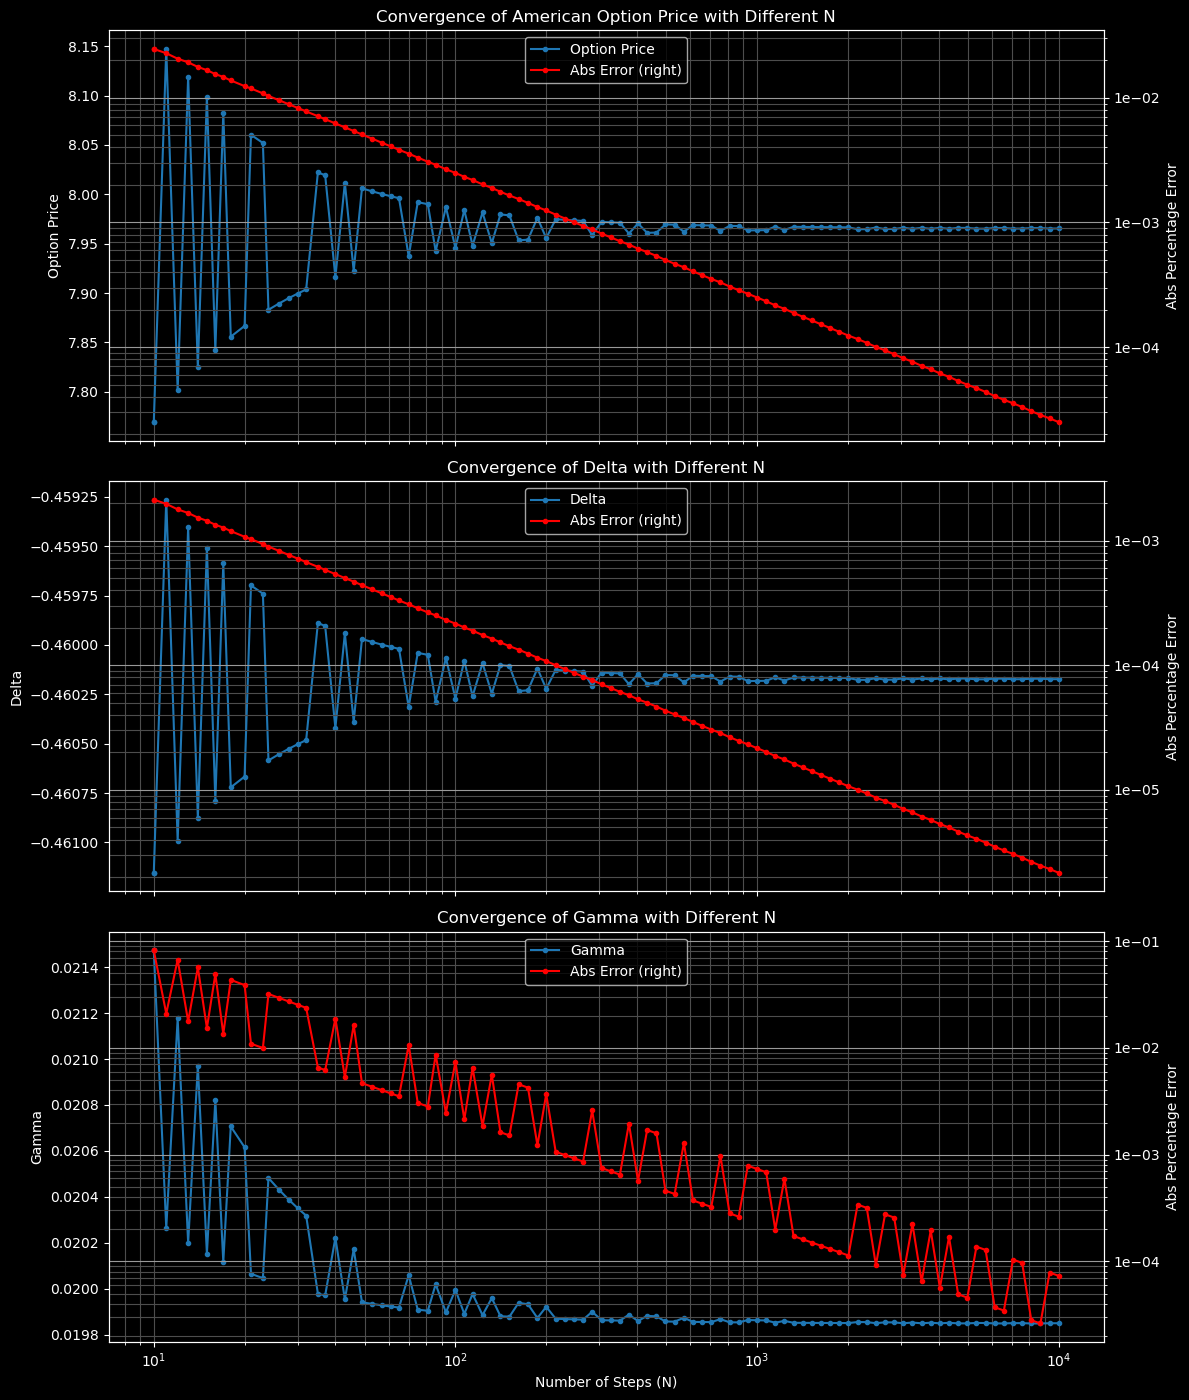

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatter, LogLocator
plt.style.use('dark_background')

# Parameters
S0 = 100
K = 100
T = 1
r = 0.00
q = 0.00
sigma = 0.2
N_values = np.logspace(1, 4, 100, dtype=int)

bs_put, delta, gamma, vega = Utils.bs_put(iv=np.array(sigma), ttm=np.array(T*252), S=np.array(S0), K=np.array(K), r=np.array(r), q=np.array(q))
print(f'BSM Put Price       : {bs_put:.6f}, Delta: {delta:.6f}, Gamma: {gamma:.6f}, Vega: {vega:<10}')

price, delta, gamma = Utils._American_Option_GBM(S0, K, T, r, q, sigma, 1000, 'put')
print(f'American Put Price  : {price:.6f}, Delta: {delta:.6f}, Gamma: {gamma:.6f}')

# Testing different N values
prices = []
deltas = []
gammas = []

for N in tqdm(N_values, leave=False):
    price, delta, gamma = Utils._American_Option_GBM(S0, K, T, r, q, sigma, N, 'put')
    prices.append(price)
    deltas.append(delta)
    gammas.append(gamma)

prices = np.array(prices)
deltas = np.array(deltas)
gammas = np.array(gammas)

# Calculate errors
price_error = np.abs((prices - bs_put) / bs_put)
delta_error = np.abs((deltas - delta) / delta)
gamma_error = np.abs((gammas - gamma) / gamma)

# Plotting the convergence
from matplotlib.ticker import LogLocator, LogFormatter
def plot():
    fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)  # Increased height for better spacing

    # Iterate over each subplot
    for i, ax in enumerate(axs):
        if i == 0:
            # Price convergence
            ax.plot(N_values, prices, marker='.', color='tab:blue', label='Option Price')
            ax.set_ylabel('Option Price')
            ax.set_title('Convergence of American Option Price with Different N')
        elif i == 1:
            # Delta convergence
            ax.plot(N_values, deltas, marker='.', color='tab:blue', label='Delta')
            ax.set_ylabel('Delta')
            ax.set_title('Convergence of Delta with Different N')
        elif i == 2:
            # Gamma convergence
            ax.plot(N_values, gammas, marker='.', color='tab:blue', label='Gamma')
            ax.set_xlabel('Number of Steps (N)')
            ax.set_ylabel('Gamma')
            ax.set_title('Convergence of Gamma with Different N')

        ax.grid(True, which='both', axis='x', color='.3')

        # Create twin y-axis for error
        ax_right = ax.twinx()
        if i == 0:
            ax_right.plot(N_values, price_error, 'r-', label='Abs Error', marker='.')
        elif i == 1:
            ax_right.plot(N_values, delta_error, 'r-', label='Abs Error', marker='.')
        elif i == 2:
            ax_right.plot(N_values, gamma_error, 'r-', label='Abs Error', marker='.')

        ax_right.set_ylabel('Abs Percentage Error')
        ax_right.set_yscale('log')

        # Configure grid for secondary y-axis
        ax_right.yaxis.set_major_locator(LogLocator())
        ax_right.yaxis.set_major_formatter(LogFormatter())
        ax_right.grid(True, which='both', axis='y', color='.3')
        ax_right.grid(True, which='major', axis='y', color='.6')

        # Collect handles and labels from both axes
        handles_primary, labels_primary = ax.get_legend_handles_labels()
        handles_secondary, labels_secondary = ax_right.get_legend_handles_labels()
        labels_secondary = [f"{label} (right)" for label in labels_secondary]

        # Combine handles and labels
        handles = handles_primary + handles_secondary
        labels = labels_primary + labels_secondary

        # Create unified legend on the top center
        ax_right.legend(handles, labels, loc='upper center')

    plt.xscale('log')
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjusted to make room for suptitle if needed
    plt.show()

plot()

------------------------------
## **Calculation of Vega for BT**

BT Put Price        : 1.595264, Delta: -0.492024, Gamma: 0.099790
BSM Put Price       : 7.965567, Delta: -0.460172, Gamma: 0.019848, Vega: 0.396953
Error: Price        : 6.370304, Delta: 0.031852, Gamma: 0.079943


>>Best Epsilon: 0.000000, Lowest Error: 0.000847, Vega: 0.396616


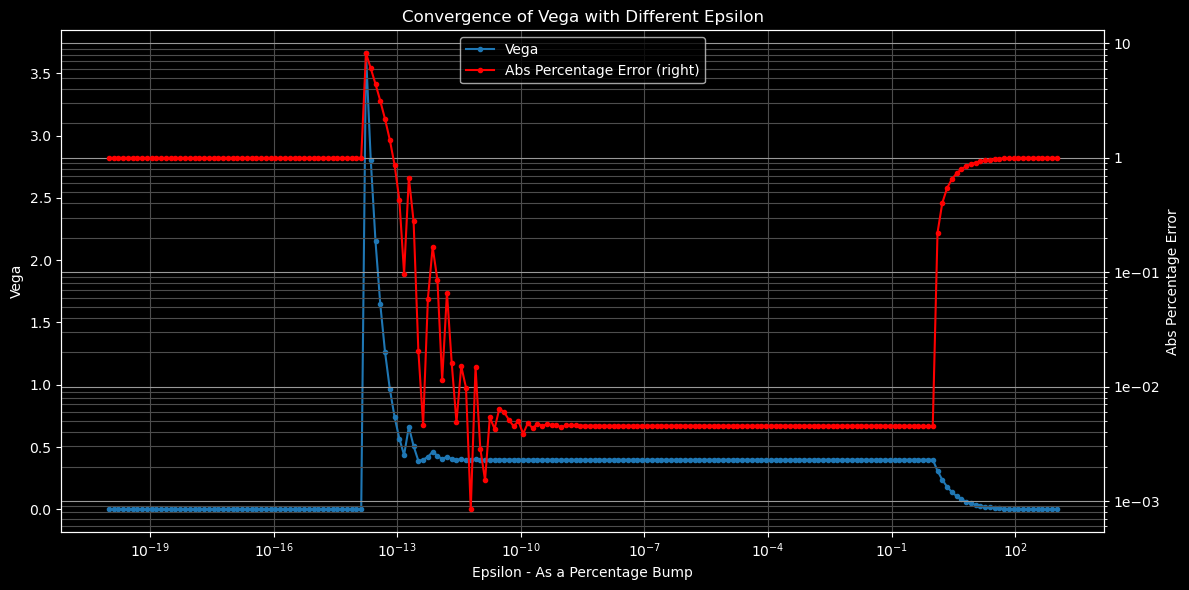

In [4]:
"""Calculation of Vega for BT"""
# Parameters
S0 = 100
K = 100
T = 1
r = 0.00
q = 0.00
v0 = 0.04
bt_steps = 1_000

BT_price, BT_delta, BT_gamma = Utils._American_Option_GBM(S0, K, T, r, q, v0, bt_steps, 'put')
print(f'BT Put Price        : {BT_price:.6f}, Delta: {BT_delta:.6f}, Gamma: {BT_gamma:.6f}')

BS_price, BS_delta, BS_gamma, BS_vega = Utils.bs_put(iv=np.array(sqrt(v0)), ttm=np.array(T*252), S=np.array(S0), K=np.array(K), r=np.array(r), q=np.array(q))
print(f'BSM Put Price       : {BS_price:.6f}, Delta: {BS_delta:.6f}, Gamma: {BS_gamma:.6f}, Vega: {BS_vega:.6f}')
print(f'Error: Price        : {np.abs(BT_price - BS_price):.6f}, Delta: {np.abs(BT_delta - BS_delta):.6f}, Gamma: {np.abs(BT_gamma - BS_gamma):.6f}')

# linspace of eps
eps_values = np.logspace(np.log10(1e-20), np.log10(1e3), 200)
# eps_values = np.linspace(1e-3, 1e1, 100)
vega_values = []

for eps in tqdm(eps_values, leave=False):
    # print(f'v0:{v0}, v0*(1+eps):{v0*(1+eps)}')
    BT_price_up     = Utils._American_Option_GBM(S0, K, T, r, q, v0 * (1+eps), bt_steps, 'put')[0]
    BT_price_down   = Utils._American_Option_GBM(S0, K, T, r, q, v0 * (1-eps), bt_steps, 'put')[0]
    
    vega = (1/100) * (BT_price_up - BT_price_down) / (2* v0 * (eps))
    vega_values.append(vega)

vega_values = np.array(vega_values)

# Calculate errors
vega_abs_relative_error = np.abs((vega_values - BS_vega) / BS_vega )

# print the value with the lowest error
min_error_idx = np.argmin(vega_abs_relative_error)
print(f">>Best Epsilon: {eps_values[min_error_idx]:.6f}, Lowest Error: {vega_abs_relative_error[min_error_idx]:.6f}, Vega: {vega_values[min_error_idx]:.6f}")

def plot():
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    # Vega convergence
    line1, = ax.plot(eps_values, vega_values, marker='.', color='tab:blue', label='Vega')
    ax.set_xlabel('Epsilon - As a Percentage Bump')
    ax.set_ylabel('Vega')
    ax.set_title('Convergence of Vega with Different Epsilon')
    ax.grid(True, which='both', axis='x', color='.3')

    # Add y values of the error on the right side of the graph
    ax_right = ax.twinx()
    line2, = ax_right.plot(eps_values, vega_abs_relative_error, 'r-', marker='.', label='Abs Percentage Error')
    ax_right.set_ylabel('Abs Percentage Error')
    ax_right.set_yscale('log')

    # Configure grid for secondary y-axis
    ax_right.yaxis.set_major_locator(LogLocator())
    ax_right.yaxis.set_major_formatter(LogFormatter())
    ax_right.grid(True, which='both', axis='y', color='.3')
    ax_right.grid(True, which='major', axis='y', color='.6')

    # Collect handles and labels
    handles_primary, labels_primary = ax.get_legend_handles_labels()
    handles_secondary, labels_secondary = ax_right.get_legend_handles_labels()
    labels_secondary = [f"{label} (right)" for label in labels_secondary]

    # Combine handles and labels
    handles = handles_primary + handles_secondary
    labels = labels_primary + labels_secondary

    # Create unified legend on the top center
    ax_right.legend(handles, labels, loc='upper center')

    plt.xscale('log')
    plt.tight_layout()
    plt.show()

plot()


## **Validation of utilsAlexander.py - Price and Greeks over different Stike Prices**

Average Percentage Errors - Price: -1.786690%, Delta: 0.000000%, Gamma: -1.057015%, Vega: 0.481575%


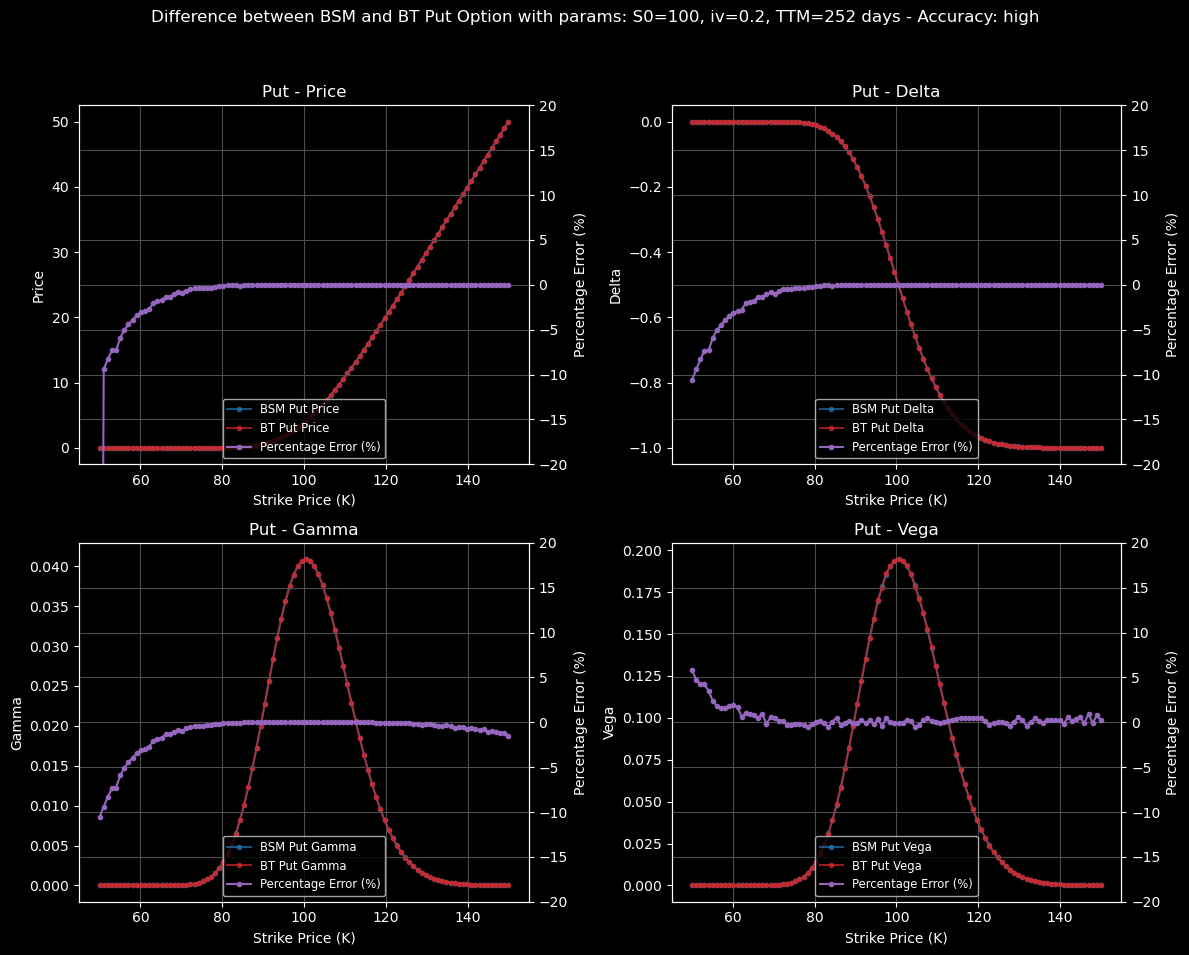

In [3]:
import importlib
import environment.utilsAlexander
importlib.reload(environment.utilsAlexander)
from environment.utilsAlexander import Utils
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import ticker for formatting
plt.style.use('dark_background')
import numpy as np

utils = Utils(  # Liability Portfolio Parameters
                S0=100., K=100., init_ttm=60, r=0.00, q=0.00, spread=0.0,
                ttms=[252], poisson_rate=1.0, 
                
                # Hedging Portfolio Parameters
                hed_ttm=180, hed_type='European',

                # init_vol is for both GBM and Heston
                init_vol=0.2,
                # Heston, Model Parameters
                kappa=2.0, theta=0.04, volvol=0.0472, rho=0.000,
                
                # Simulation Parameters
                stochastic_process='GBM', time_to_simulate=60, num_sim=4092, frq=1,
                numerical_accuracy="high" , n_jobs=8, np_seed=1234,

                # RL Environment Parameters
                action_low=0, action_high=3,
        )

Ks = np.linspace(50, 150, 100, dtype=float)[:, None]
Ss = np.full_like(Ks, utils.S0)
ivs = np.full_like(Ks, utils.init_vol)
init_ttm = np.full_like(Ks, utils.init_ttm)

# BSM Put
fft_price, fft_delta, fft_gamma, fft_vega = utils.European_put_option(iv=ivs, ttms=init_ttm, S0=Ss, K=Ks, T=252, stochastic_process='GBM')

# Binomial Put
bt_price, bt_delta, bt_gamma, bt_vega = utils.American_put_option(iv=ivs, ttms=init_ttm, S0=Ss, K=Ks, T=252, stochastic_process='GBM')

def plot():
    """Plots BSM vs. Binomial Tree Put Option metrics with Percentage Error."""
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plot_data = [
        (fft_price, bt_price, 'Price'),
        (fft_delta, bt_delta, 'Delta'),
        (fft_gamma, bt_gamma, 'Gamma'),
        (fft_vega,  bt_vega,  'Vega')
    ]

    for ax, (analytical, numerical, label) in zip(axs.flatten(), plot_data):
        ax.plot(Ks, analytical, label=f'BSM Put {label}', color='tab:blue', marker='.', zorder=101, alpha=0.7)
        ax.plot(Ks, numerical, label=f'BT Put {label}', linestyle='-', color='tab:red', marker='.', zorder=101, alpha=0.7)

        # Calculate Percentage Error
        error = ((numerical.flatten() - analytical.flatten()) / analytical.flatten()) * 100

        # Secondary y-axis for Percentage Error
        ax2 = ax.twinx()
        ax2.plot(Ks, error, label='Percentage Error (%)', color='tab:purple', marker='.', linestyle='-', zorder=102)
        ax2.set_ylabel('Percentage Error (%)')

        # Format y-axis
        formatter = ticker.ScalarFormatter(useMathText=False)
        formatter.set_scientific(False)
        formatter.set_useOffset(False)
        ax2.yaxis.set_major_formatter(formatter)
        ax2.set_ylim([-20, 20])
        ax2.grid(True, which='major', axis='y', color='.3')

        # Combine legends
        lines_1, labels_1 = ax.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower center', fontsize='small').set_zorder(103)

        ax.set_title(f'Put - {label}', fontsize=12)
        ax.set_xlabel('Strike Price (K)', fontsize=10)
        ax.set_ylabel(label, fontsize=10)
        ax.grid(True, which='both', axis='x', color='.3', zorder=100)

    fig.suptitle(
        f'Difference between BSM and BT Put Option with params: S0={int(utils.S0)}, iv={utils.init_vol}, '
        f'TTM=252 days - Accuracy: {utils.numerical_accuracy}', fontsize=12
    )
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def calculate_average_errors():
    """Calculates and prints the average percentage errors for Price, Delta, Gamma, and Vega."""
    avg_price_error = np.where(fft_price > 0 , ((bt_price - fft_price) / fft_price) * 100 , 0)
    avg_delta_error = np.where(fft_delta > 0 , ((bt_delta - fft_delta) / fft_delta) * 100 , 0)
    avg_gamma_error = np.where(fft_gamma > 0 , ((bt_gamma - fft_gamma) / fft_gamma) * 100 , 0)
    avg_vega_error  = np.where(fft_vega  > 0 , ((bt_vega - fft_vega) / fft_vega) * 100    , 0)
    print(
        f'Average Percentage Errors - Price: {avg_price_error.mean():.6f}%, '
        f'Delta: {avg_delta_error.mean():.6f}%, '
        f'Gamma: {avg_gamma_error.mean():.6f}%, '
        f'Vega: {avg_vega_error.mean():.6f}%'
    )

calculate_average_errors()
plot()

-----------------------------------
# **(FFT.q) Numerical Results for Heston_FFT for European Options**

In [18]:
import QuantLib as ql

def European_Option_Heston(S0, K, T, r, q, v0, kappa, theta, volvol, rho, Type='put', accuracy=1e-6, max_evaluations=1000):
    """
    Calculate the price and Greeks (Delta, Gamma) of a European option under the Heston stochastic 
    volatility model using QuantLib.

    Parameters:
    -----------
    S0 : float
        Initial stock price.
    K : float
        Strike price of the option.
    T : float
        Time to maturity in years.
    r : float
        Risk-free interest rate.
    q : float
        Continuous dividend yield.
    v0 : float
        Initial variance (squared volatility) of the underlying asset.
    kappa : float
        Rate at which variance reverts to its long-term mean (theta).
    theta : float
        Long-term mean of the variance.
    volvol : float
        Volatility of the variance process (volatility of volatility).
    rho : float
        Correlation between the asset price and its variance.
    N_gridpoints : int, optional
        Number of grid points for the finite difference method, by default 100.
    Type : str, optional
        Type of option ('call' or 'put'), by default 'put'.
    accuracy : float, optional
        Relative tolerance for the pricing engine. Lower values increase accuracy, 
        by default 1e-6.
    max_evaluations : int, optional
        Maximum number of evaluations for the pricing engine, by default 1000.

    Returns:
    --------
    price : float
        The calculated price of the option.
    delta : float
        The Delta of the option.
    gamma : float
        The Gamma of the option.

    Notes:
    ------
    This function uses QuantLib's AnalyticHestonEngine to price European options under the Heston model.
    """
    if 2 * kappa * theta < volvol**2:
        print(f"Warning: Feller condition violated: 2*kappa*theta < volvol**2")

    # Set evaluation date to today
    today = ql.Date().todaysDate()
    maturity = today + ql.Period(int(T * 365), ql.Days)

    # Market data
    spot = ql.QuoteHandle(ql.SimpleQuote(S0))
    riskFreeTS = ql.YieldTermStructureHandle(
        ql.FlatForward(today, r, ql.Actual365Fixed())
    )
    dividendTS = ql.YieldTermStructureHandle(
        ql.FlatForward(today, q, ql.Actual365Fixed())
    )

    # Heston model parameters
    process = ql.HestonProcess(
        riskFreeTS, dividendTS, spot, v0, kappa, theta, volvol, rho
    )
    model = ql.HestonModel(process)
    
    # Set up the AnalyticHestonEngine with specified accuracy
    engine = ql.AnalyticHestonEngine(model, accuracy, max_evaluations)

    # Define payoff and exercise
    payoff = ql.PlainVanillaPayoff(
        ql.Option.Call if Type.lower() == 'call' else ql.Option.Put, K
    )
    exercise = ql.EuropeanExercise(maturity)
    option = ql.VanillaOption(payoff, exercise)

    # Set the pricing engine
    option.setPricingEngine(engine)

    # Calculate option price and Greeks
    price = option.NPV()

    return price

# Example usage:
price = European_Option_Heston(
    S0=100, K=100, T=1, r=0.05, q=0.02, 
    v0=0.04, kappa=1.5, theta=0.04, 
    volvol=0.3, rho=-0.5, Type='call',

    accuracy=1e-8, max_evaluations=5000
)

Price: 9.011831716334257


Reference Price (High Accuracy): -0.000000


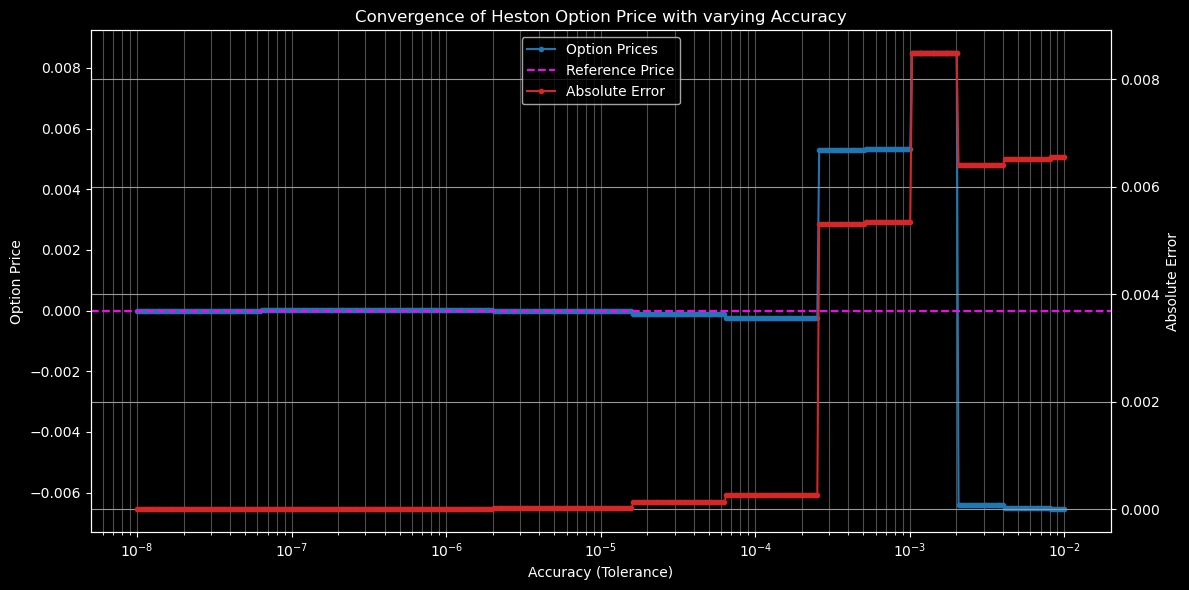

Option Price  Absolute Error
Accuracy                                  
1.000000e-08  4.908659e-09    4.948467e-09
3.992109e-08  6.863430e-09    6.903238e-09
1.593694e-07  4.968284e-06    4.968324e-06
6.362198e-07  4.964775e-06    4.964815e-06
2.539859e-06 -2.710086e-05    2.710082e-05
1.013939e-05 -1.703395e-05    1.703391e-05
4.047757e-05 -1.276337e-04    1.276337e-04
1.615909e-04 -2.613250e-04    2.613250e-04
6.450884e-04  5.339404e-03    5.339404e-03
2.575263e-03 -6.405319e-03    6.405319e-03

In [8]:
# Import necessary libraries
import QuantLib as ql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatter

# Define the European_Option_Heston function
def European_Option_Heston(S0, K, T, r, q, v0, kappa, theta, volvol, rho, Type='put', accuracy=1e-10, max_evaluations=10_000):
    """
    Calculate the price of a European option under the Heston stochastic 
    volatility model using QuantLib's AnalyticHestonEngine.

    Parameters:
    -----------
    S0 : float
        Initial stock price.
    K : float
        Strike price of the option.
    T : float
        Time to maturity in years.
    r : float
        Risk-free interest rate.
    q : float
        Continuous dividend yield.
    v0 : float
        Initial variance (squared volatility) of the underlying asset.
    kappa : float
        Rate at which variance reverts to its long-term mean (theta).
    theta : float
        Long-term mean of the variance.
    volvol : float
        Volatility of the variance process (volatility of volatility).
    rho : float
        Correlation between the asset price and its variance.
    N_gridpoints : int, optional
        Number of grid points for the finite difference method, by default 100.
    Type : str, optional
        Type of option ('call' or 'put'), by default 'put'.
    accuracy : float, optional
        Relative tolerance for the pricing engine. Lower values increase accuracy, 
        by default 1e-6.
    max_evaluations : int, optional
        Maximum number of evaluations for the pricing engine, by default 1000.

    Returns:
    --------
    price : float
        The calculated price of the option.
    """
    if 2 * kappa * theta < volvol**2:
        print(f"Warning: Feller condition violated: 2*kappa*theta < volvol**2")

    # Set evaluation date to today
    today = ql.Date().todaysDate()
    maturity = today + ql.Period(int(T * 365), ql.Days)

    # Market data
    spot = ql.QuoteHandle(ql.SimpleQuote(S0))
    riskFreeTS = ql.YieldTermStructureHandle(
        ql.FlatForward(today, r, ql.Actual365Fixed())
    )
    dividendTS = ql.YieldTermStructureHandle(
        ql.FlatForward(today, q, ql.Actual365Fixed())
    )

    # Heston model parameters
    process = ql.HestonProcess(
        riskFreeTS, dividendTS, spot, v0, kappa, theta, volvol, rho
    )
    model = ql.HestonModel(process)
    
    # Set up the AnalyticHestonEngine with specified accuracy
    engine = ql.AnalyticHestonEngine(model, accuracy, max_evaluations)

    # Define payoff and exercise
    payoff = ql.PlainVanillaPayoff(
        ql.Option.Call if Type.lower() == 'call' else ql.Option.Put, K
    )
    exercise = ql.EuropeanExercise(maturity)
    option = ql.VanillaOption(payoff, exercise)

    # Set the pricing engine
    option.setPricingEngine(engine)

    # Calculate option price
    price = option.NPV()

    return price

# --------------------- Analysis Parameters ---------------------

# Choose which parameter to analyze: 'accuracy' or 'max_evaluations'
analysis_parameter = 'accuracy'  # Change to 'max_evaluations' as needed

# Fixed Heston model parameters
S0 = 50          # Initial stock price
K = 100           # Strike price
T = 1/365             # Time to maturity in years
r = 0.05          # Risk-free interest rate
q = 0.02          # Continuous dividend yield
v0 = 0.04         # Initial variance
kappa = 1.5       # Rate of mean reversion
theta = 0.04      # Long-term variance mean
volvol = 0.3      # Volatility of variance
rho = -0.5        # Correlation between asset and variance
Type = 'call'     # Option type

# Reference price using high accuracy and max evaluations
reference_price = European_Option_Heston(
    S0=S0, K=K, T=T, r=r, q=q, v0=v0, 
    kappa=kappa, theta=theta, volvol=volvol, rho=rho, 
    Type=Type, accuracy=1e-10, max_evaluations=10000
)

print(f'Reference Price (High Accuracy): {reference_price:.6f}')

# Define range for the analysis parameter
if analysis_parameter == 'accuracy':
    # Varying accuracy from 1e-2 to 1e-8
    parameter_values = np.logspace(-8, -2, 500)
    parameter_label = 'Accuracy'
    x_label = 'Accuracy (Tolerance)'
elif analysis_parameter == 'max_evaluations':
    # Varying max_evaluations from 100 to 10000
    parameter_values = np.logspace(2.5, 5, 500, dtype=int)
    parameter_label = 'Max Evaluations'
    x_label = 'Max Evaluations'
else:
    raise ValueError("analysis_parameter must be either 'accuracy' or 'max_evaluations'.")

# Initialize list to store option prices
option_prices = []

# Loop over parameter values and compute option prices
for param in parameter_values:
    if analysis_parameter == 'accuracy':
        price = European_Option_Heston(
            S0=S0, K=K, T=T, r=r, q=q, v0=v0, 
            kappa=kappa, theta=theta, volvol=volvol, rho=rho, 
            Type=Type, accuracy=param, max_evaluations=10000
        )
    elif analysis_parameter == 'max_evaluations':
        price = European_Option_Heston(
            S0=S0, K=K, T=T, r=r, q=q, v0=v0, 
            kappa=kappa, theta=theta, volvol=volvol, rho=rho, 
            Type=Type, accuracy=1e-6, max_evaluations=int(param)
        )
    option_prices.append(price)

# Convert list to numpy array for easier handling
option_prices = np.array(option_prices)

# Calculate absolute error compared to reference price
error = np.abs(option_prices - reference_price)

# --------------------- Plotting Function ---------------------

def plot_convergence(x, prices, error, parameter_label, x_label, reference_price):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot Option Prices
    line1, = ax.plot(x, prices, label='Option Prices', marker='.', color='tab:blue')
    ax.axhline(y=reference_price, color='magenta', linestyle='--', label='Reference Price')
    ax.set_xlabel(x_label)
    ax.set_ylabel('Option Price')
    ax.set_title(f'Convergence of Heston Option Price with varying {parameter_label}')
    ax.grid(True, which='both', axis='x', color='.3')

    # Add y values of the error on the right side of the graph
    ax_right = ax.twinx()
    line2, = ax_right.plot(x, error, label='Absolute Error', marker='.', color='tab:red')
    ax_right.set_ylabel('Absolute Error')

    # Configure grid for secondary y-axis
    ax_right.grid(True, which='both', axis='y', color='.3')
    ax_right.grid(True, which='major', axis='y', color='.6')

    # Collect handles and labels from both axes
    handles_primary, labels_primary = ax.get_legend_handles_labels()
    handles_secondary, labels_secondary = ax_right.get_legend_handles_labels()

    # Combine handles and labels
    handles = handles_primary + handles_secondary
    labels = labels_primary + labels_secondary

    # Create unified legend on the upper center
    ax_right.legend(handles, labels, loc='upper center')

    # Set x-axis to log scale if parameter varies exponentially
    if analysis_parameter in ['accuracy', 'max_evaluations']:
        ax.set_xscale('log')

    plt.tight_layout()
    plt.show()

# Plot the convergence and error
plot_convergence(
    x=parameter_values, 
    prices=option_prices, 
    error=error, 
    parameter_label=parameter_label, 
    x_label=x_label, 
    reference_price=reference_price
)

# --------------------- Results DataFrame ---------------------

# Create a DataFrame for selected results
step = 50  # Adjust the step for number of points in the DataFrame
results_df = pd.DataFrame({
    'Option Price': option_prices[::step],
    'Absolute Error': error[::step]
}, index=parameter_values[::step])

# Rename the index for clarity
results_df.index.name = parameter_label

# Display the DataFrame
results_df

-----------------------------------
## **Numerical Differentiation for Greeks for European Put for the FFT method**

Heston FFT Put Price: 51.621372
BSM Put Price       : 7.965567, Delta: -0.460172, Gamma: 0.019848, Vega: 0.396953
>>Error: 43.655804 , Percent Error: 548.056425


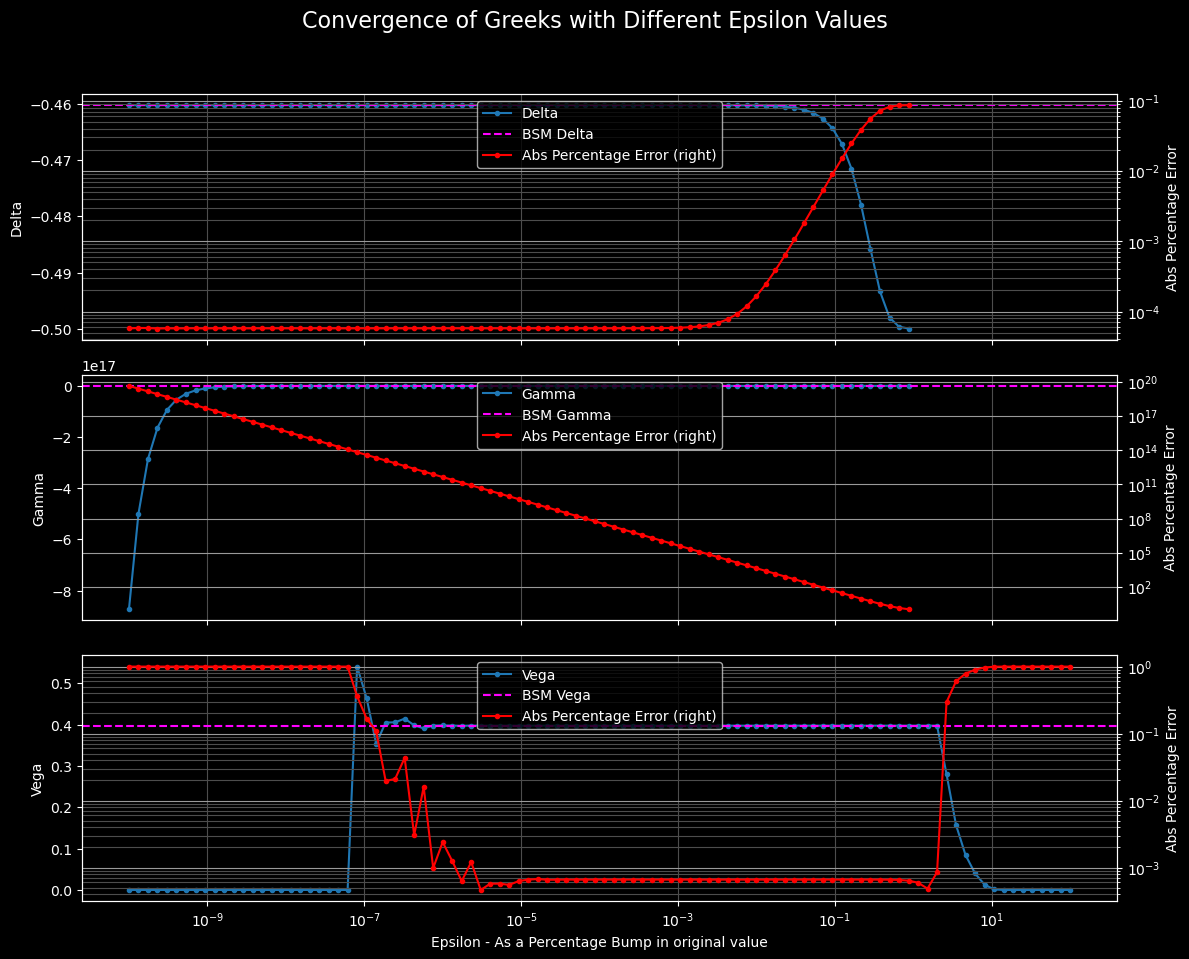

In [8]:
import warnings
from scipy.integrate import IntegrationWarning
from tqdm import tqdm
# Ignore specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=IntegrationWarning)

# Parameters
S0 = K = 100
T = 1
r = 0.00
q = 0.00
kappa = 2.0
theta = 0.04
sigma = 0.0472 #0.0472
v0 = 0.04
rho = 0.000
opt_type = 'p'
right_lim = 100

FFT_price = Utils.European_Option_Heston(S0, K, T, r, q, kappa, theta, sigma, v0, rho, opt_type)
print(f'Heston FFT Put Price: {FFT_price:.6f}')

BS_price, BS_delta, BS_gamma, BS_vega = Utils.bs_put(iv=np.array(np.sqrt(v0)), ttm=np.array(T*252), S=np.array(S0), K=np.array(K), r=np.array(r), q=np.array(0))
print(f'BSM Put Price       : {BS_price:.6f}, Delta: {BS_delta:.6f}, Gamma: {BS_gamma:.6f}, Vega: {BS_vega:.6f}')
print(f'>>Error: {np.abs(FFT_price - BS_price):.6f} , Percent Error: {np.abs(FFT_price - BS_price)/BS_price*100:.6f}')

# linspace of eps
eps_values = np.logspace(np.log10(1e-10), np.log10(1e2), 100)
delta_values = []
gamma_values = []
vega_values = []

for eps in tqdm(eps_values, leave=False):
    FFT_price_peps = Utils.Heston_FFT(S0 * (1 + eps), K, T, r, q, kappa, theta, sigma, v0, rho, opt_type, right_lim)
    FFT_price_meps = Utils.Heston_FFT(S0 * (1 - eps), K, T, r, q, kappa, theta, sigma, v0, rho, opt_type, right_lim)
    
    delta = (FFT_price_peps - FFT_price_meps) / (2 * S0 * eps)
    delta_values.append(delta)

    gamma = (FFT_price_peps - 2 * FFT_price + FFT_price_meps) / (S0 * eps)**2
    gamma_values.append(gamma)

    # Adjusted theta and v0 with perturbation
    vol_eps     = (np.sqrt(v0) * (eps))**2
    theta_up, theta_down  = (np.sqrt(theta)   + vol_eps)**2 ,   (np.sqrt(theta) - vol_eps)**2
    v0_up   , v0_down     = (np.sqrt(v0)      + vol_eps)**2 ,   (np.sqrt(v0)      - vol_eps)**2
    FFT_vol_up  = Utils.Heston_FFT(S0, K, T, r, q, kappa, theta_up, sigma, v0_up, rho, opt_type, right_lim)
    FFT_vol_down= Utils.Heston_FFT(S0, K, T, r, q, kappa, theta_down, sigma, v0_down, rho, opt_type, right_lim)
    
    vega = (1/100) * (FFT_vol_up - FFT_vol_down) / (2*vol_eps)
    vega_values.append(vega)

delta_values = np.array(delta_values)
gamma_values = np.array(gamma_values)
vega_values = np.array(vega_values)

# Calculate errors
delta_error = np.abs((delta_values - BS_delta) / BS_delta)
gamma_error = np.abs((gamma_values - BS_gamma) / BS_gamma)
vega_error = np.abs((vega_values - BS_vega) / BS_vega)

def plot():
    # Plotting the convergence
    fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
    plt.suptitle('Convergence of Greeks with Different Epsilon Values', fontsize=16)

    # Delta convergence
    axs[0].plot(eps_values, delta_values, marker='.', color='tab:blue', label='Delta')
    axs[0].set_ylabel('Delta')
    axs[0].grid(True, which='both', axis='x', color='.3')
    axs[0].axhline(y=BS_delta, color='magenta', linestyle='--', label='BSM Delta')

    # Add y values of the error on the right side of the graph
    ax0 = axs[0].twinx()
    ax0.plot(eps_values, delta_error, 'r-', label='Abs Percentage Error', marker='.')
    ax0.set_ylabel('Abs Percentage Error')
    ax0.set_yscale('log')
    ax0.grid(True, which='both', axis='y', color='.3')
    ax0.grid(True, which='major', axis='y', color='.6')

    # Combine legends for Delta subplot
    handles1, labels1 = axs[0].get_legend_handles_labels()
    handles2, labels2 = ax0.get_legend_handles_labels()
    labels2 = [f"{label} (right)" for label in labels2]  # Append "(right)" to secondary labels
    handles = handles1 + handles2
    labels = labels1 + labels2
    ax0.legend(handles, labels, loc='upper center')  # Unified legend on top

    # Gamma convergence
    axs[1].plot(eps_values, gamma_values, marker='.', color='tab:blue', label='Gamma')
    axs[1].set_ylabel('Gamma')
    axs[1].grid(True, which='both', axis='x', color='.3')
    axs[1].axhline(y=BS_gamma, color='magenta', linestyle='--', label='BSM Gamma')

    # Add y values of the error on the right side of the graph
    ax1 = axs[1].twinx()
    ax1.plot(eps_values, gamma_error, 'r-', label='Abs Percentage Error', marker='.')
    ax1.set_ylabel('Abs Percentage Error')
    ax1.set_yscale('log')
    ax1.grid(True, which='both', axis='y', color='.3')
    ax1.grid(True, which='major', axis='y', color='.6')

    # Combine legends for Gamma subplot
    handles1, labels1 = axs[1].get_legend_handles_labels()
    handles2, labels2 = ax1.get_legend_handles_labels()
    labels2 = [f"{label} (right)" for label in labels2]
    handles = handles1 + handles2
    labels = labels1 + labels2
    ax1.legend(handles, labels, loc='upper center')  # Unified legend on top

    # Vega convergence
    axs[2].plot(eps_values, vega_values, marker='.', color='tab:blue', label='Vega')
    axs[2].set_xlabel('Epsilon - As a Percentage Bump in original value')
    axs[2].set_ylabel('Vega')
    axs[2].grid(True, which='both', axis='x', color='.3')
    axs[2].axhline(y=BS_vega, color='magenta', linestyle='--', label='BSM Vega')

    # Add y values of the error on the right side of the graph
    ax2 = axs[2].twinx()
    ax2.plot(eps_values, vega_error, 'r-', label='Abs Percentage Error', marker='.')
    ax2.set_ylabel('Abs Percentage Error')
    ax2.set_yscale('log')
    ax2.grid(True, which='both', axis='y', color='.3')
    ax2.grid(True, which='major', axis='y', color='.6')

    # Combine legends for Vega subplot
    handles1, labels1 = axs[2].get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    labels2 = [f"{label} (right)" for label in labels2]
    handles = handles1 + handles2
    labels = labels1 + labels2
    ax2.legend(handles, labels, loc='upper center')  # Unified legend on top

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate suptitle
    plt.xscale('log')
    plt.show()

plot()
# vega_error

## **Validation of utilsAlexander.py - Price and Greeks over different Stike Prices**

/home/atsoskouno/miniforge3/envs/QF9/lib/python3.9/site-packages/joblib/parallel.py:1362: UserWarning:

The backend class 'SequentialBackend' does not support timeout. You have set 'timeout=120' in Parallel but the 'timeout' parameter will not be used.



Average Percentage Errors - Price: 1.768450%, Delta: 0.000000%, Gamma: -221606.922185%, Vega: -46.525515%


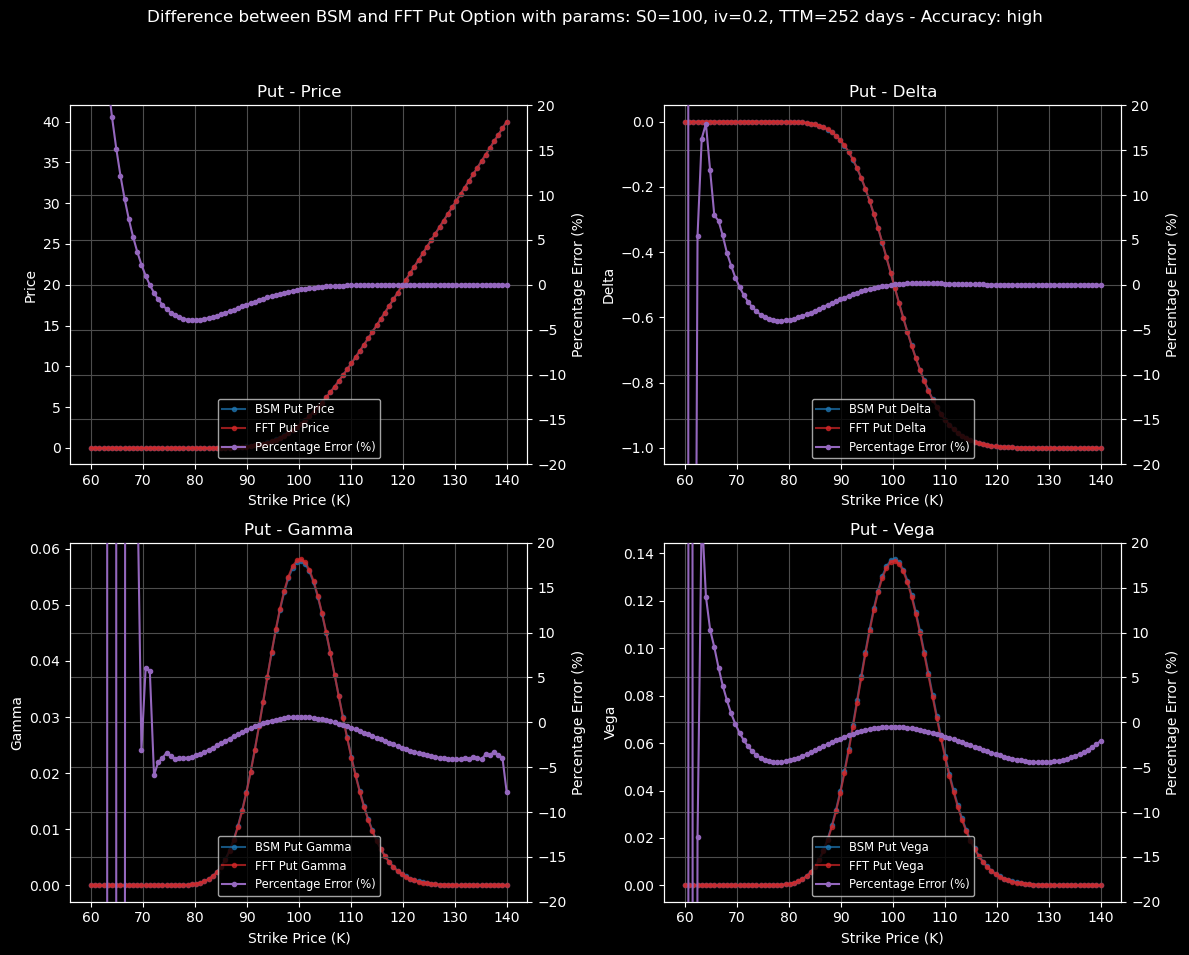

In [8]:
import importlib
import environment.utilsAlexander
importlib.reload(environment.utilsAlexander)
from environment.utilsAlexander import Utils
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import ticker for formatting
plt.style.use('dark_background')
import numpy as np

# Initialize Utils with FFT-based numerical method
utils = Utils(
    # Liability Portfolio Parameters
    S0=100., K=100., init_ttm=30, r=0.00, q=0.00, spread=0.0,
    ttms=[252], poisson_rate=1.0, 
    
    # Hedging Portfolio Parameters
    hed_ttm=180, hed_type='European',

    # init_vol is for both GBM and Heston
    init_vol=0.2,
    # Heston, Model Parameters (if FFT requires similar parameters, otherwise adjust)
    kappa=2.0, theta=0.04, volvol=0.0472, rho=0.000,
    
    # Simulation Parameters
    stochastic_process='Heston',  # Changed to FFT
    time_to_simulate=60, num_sim=4092, frq=1,
    numerical_accuracy="high", n_jobs=1, np_seed=1234,

    # RL Environment Parameters
    action_low=0, action_high=3,
)

Ks = np.linspace(50, 150, 100, dtype=float)[:, None]
Ks = np.linspace(60, 140, 100, dtype=float)[:, None]
Ss = np.full_like(Ks, utils.S0)
ivs = np.full_like(Ks, utils.init_vol)
init_ttm = np.full_like(Ks, utils.init_ttm)

# BSM Put
fft_price, fft_delta, fft_gamma, fft_vega       = utils.European_put_option(iv=ivs, ttms=init_ttm, S0=Ss, K=Ks, T=252, stochastic_process='GBM')

# FFT-based Put
fdm_price, fdm_delta, fdm_gamma, fdm_vega   = utils.European_put_option(iv=ivs, ttms=init_ttm, S0=Ss, K=Ks, T=252, stochastic_process='Heston')

def plot():
    """Plots BSM vs. FFT Put Option metrics with Percentage Error."""
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plot_data = [
        (fft_price, fdm_price, 'Price'),
        (fft_delta, fdm_delta, 'Delta'),
        (fft_gamma, fdm_gamma, 'Gamma'),
        (fft_vega,  fdm_vega,  'Vega')
    ]

    for ax, (analytical, numerical, label) in zip(axs.flatten(), plot_data):
        ax.plot(Ks, analytical, label=f'BSM Put {label}', color='tab:blue', marker='.', zorder=101, alpha=0.7)
        ax.plot(Ks, numerical, label=f'FFT Put {label}', linestyle='-', color='tab:red', marker='.', zorder=101, alpha=0.7)

        # Calculate Percentage Error
        error = ((numerical.flatten() - analytical.flatten()) / analytical.flatten()) * 100

        # Secondary y-axis for Percentage Error
        ax2 = ax.twinx()
        ax2.plot(Ks, error, label='Percentage Error (%)', color='tab:purple', marker='.', linestyle='-', zorder=102)
        ax2.set_ylabel('Percentage Error (%)')

        # Format y-axis
        formatter = ticker.ScalarFormatter(useMathText=False)
        formatter.set_scientific(False)
        formatter.set_useOffset(False)
        ax2.yaxis.set_major_formatter(formatter)
        ax2.set_ylim([-20, 20])
        ax2.grid(True, which='major', axis='y', color='.3')

        # Combine legends
        lines_1, labels_1 = ax.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower center', fontsize='small').set_zorder(103)

        ax.set_title(f'Put - {label}', fontsize=12)
        ax.set_xlabel('Strike Price (K)', fontsize=10)
        ax.set_ylabel(label, fontsize=10)
        ax.grid(True, which='both', axis='x', color='.3', zorder=100)

    fig.suptitle(
        f'Difference between BSM and FFT Put Option with params: S0={int(utils.S0)}, iv={utils.init_vol}, '
        f'TTM=252 days - Accuracy: {utils.numerical_accuracy}', fontsize=12
    )
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def calculate_average_errors():
    """Calculates and prints the average percentage errors for Price, Delta, Gamma, and Vega."""
    avg_price_error = np.where(fft_price > 0 , ((fdm_price - fft_price) / fft_price) * 100 , 0)
    avg_delta_error = np.where(fft_delta > 0 , ((fdm_delta - fft_delta) / fft_delta) * 100 , 0)
    avg_gamma_error = np.where(fft_gamma > 0 , ((fdm_gamma - fft_gamma) / fft_gamma) * 100 , 0)
    avg_vega_error  = np.where(fft_vega  > 0 , ((fdm_vega - fft_vega) / fft_vega) * 100    , 0)
    print(
        f'Average Percentage Errors - Price: {avg_price_error.mean():.6f}%, '
        f'Delta: {avg_delta_error.mean():.6f}%, '
        f'Gamma: {avg_gamma_error.mean():.6f}%, '
        f'Vega: {avg_vega_error.mean():.6f}%'
    )

calculate_average_errors()
plot()


----------------------------------------
# **(FDM) Numerical Results for Finite Differences Method for American Options**

Heston FDM European Put: Price: 7.965647 , Delta: -0.460179, Gamma: 0.019848
BSM Put Price       : 7.965567, Delta: -0.460172, Gamma: 0.019848, Vega: 0.396953
Errors: Price: 0.000079, Delta: 0.000007, Gamma: 0.000000


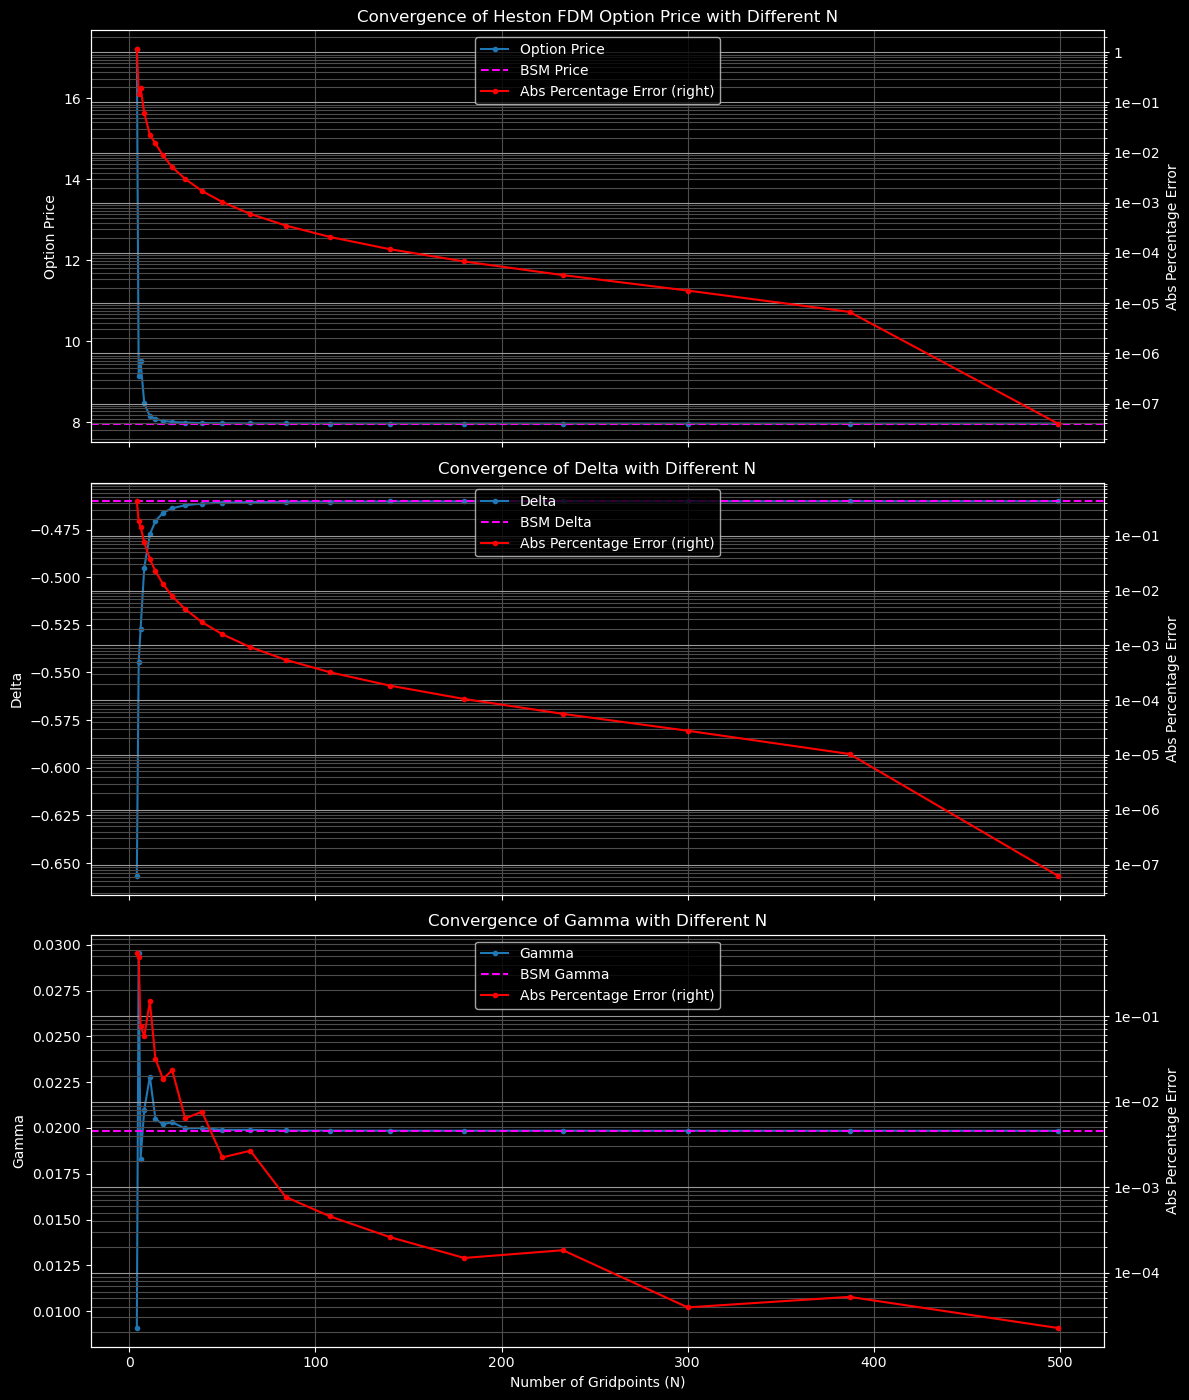

Option Price   Price Error   Delta Error  Gamma Error
4       17.211348  1.160697e+00  4.269616e-01     0.542109
5        9.149749  1.486511e-01  1.829179e-01     0.487398
6        9.507233  1.935293e-01  1.461078e-01     0.077000
8        8.465142  6.270617e-02  7.559028e-02     0.057971
11       8.145222  2.254364e-02  3.774174e-02     0.149077
14       8.087144  1.525263e-02  2.261712e-02     0.031787
18       8.036073  8.841252e-03  1.328203e-02     0.018438
23       8.006570  5.137441e-03  7.925366e-03     0.023279
30       7.989523  2.997422e-03  4.568009e-03     0.006358
39       7.979374  1.723280e-03  2.653933e-03     0.007639
50       7.973899  1.035986e-03  1.591636e-03     0.002229
65       7.970428  6.001911e-04  9.266051e-04     0.002668
84       7.968458  3.529000e-04  5.448831e-04     0.000767
108      7.967304  2.080298e-04  3.217287e-04     0.000454
140      7.966595  1.190422e-04  1.843458e-04     0.000260
180      7.966187  6.774686e-05  1.050127e-04     0.000148
233      7.965936  3.624673e-05  5.623822e-05     0.000183
300      7.965789  1.783942e-05  2.768817e-05     0.000039
387      7.965700  6.703629e-06  1.041008e-05     0.000052
499      7.965647  3.977311e-08  6.229013e-08     0.000022

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, LogFormatter
from tqdm import tqdm
import pandas as pd

# Assuming Utils is a module you've defined with the necessary functions
# from Utils import _American_Option_Heston, bs_put

# Parameters
S0 = 100
K = 100
T = 1
r = 0.00
q = 0.00
kappa = 20.0
theta = 0.04
sigma = 0.0001
v0 = 0.04
rho = 0.000
opt_type = 'p'

# Compute FDM and BSM values for N_gridpoints=500
FDM_500_price, FDM_500_delta, FDM_500_gamma = Utils._American_Option_Heston(
    S0, K, T, r, q, v0, kappa, theta, sigma, rho,
    N_gridpoints=500, Type='put', exercise='European'
)
print(f'Heston FDM European Put: Price: {FDM_500_price:.6f} , Delta: {FDM_500_delta:.6f}, Gamma: {FDM_500_gamma:.6f}')

BS_price, BS_delta, BS_gamma, BS_vega = Utils.bs_put(
    iv=np.sqrt(v0), ttm=np.array(T*252), S=np.array(S0), K=np.array(K),
    r=np.array(r), q=np.array(q)
)
print(f'BSM Put Price       : {BS_price:.6f}, Delta: {BS_delta:.6f}, Gamma: {BS_gamma:.6f}, Vega: {BS_vega:.6f}')
print(f'Errors: Price: {np.abs(FDM_500_price - BS_price):.6f}, Delta: {np.abs(FDM_500_delta - BS_delta):.6f}, Gamma: {np.abs(FDM_500_gamma - BS_gamma):.6f}')

# Linspace of N_gridpoints
N_gridpoints_values = np.logspace(np.log10(4), np.log10(500), 20, dtype=int)
price_values = []
delta_values = []
gamma_values = []
vega_values  = []

for N_gridpoints in tqdm(N_gridpoints_values, leave=False):
    # Compute FDM values for each N_gridpoints
    FDM_price, FDM_delta, gamma = Utils._American_Option_Heston(
        S0, K, T, r, q, v0, kappa, theta, sigma, rho,
        N_gridpoints=int(N_gridpoints), Type='put', exercise='European'
    )
    price_values.append(FDM_price)
    delta_values.append(FDM_delta)
    gamma_values.append(gamma)

price_values = np.array(price_values)
delta_values = np.array(delta_values)
gamma_values = np.array(gamma_values)

# Calculate percentage errors
price_error = np.abs((price_values - FDM_500_price) / FDM_500_price)
delta_error = np.abs((delta_values - FDM_500_delta) / FDM_500_delta)
gamma_error = np.abs((gamma_values - FDM_500_gamma) / FDM_500_gamma)

def plot():
    # Plotting the convergence
    fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)  # Increased height for better spacing

    # Titles for each subplot
    titles = [
        'Convergence of Heston FDM Option Price with Different N',
        'Convergence of Delta with Different N',
        'Convergence of Gamma with Different N'
    ]

    # Y-axis labels for primary data
    primary_labels = ['Option Price', 'Delta', 'Gamma']

    # BSM values for horizontal lines
    BS_values = [BS_price, BS_delta, BS_gamma]
    BS_labels = ['BSM Price', 'BSM Delta', 'BSM Gamma']

    # Iterate over each subplot
    for i, ax in enumerate(axs):
        # Plot primary data (FDM results)
        if i == 0:
            ax.plot(N_gridpoints_values, price_values, marker='.', color='tab:blue', label=primary_labels[i])
        elif i == 1:
            ax.plot(N_gridpoints_values, delta_values, marker='.', color='tab:blue', label=primary_labels[i])
        elif i == 2:
            ax.plot(N_gridpoints_values, gamma_values, marker='.', color='tab:blue', label=primary_labels[i])

        # Plot BSM horizontal line
        ax.axhline(y=BS_values[i], color='magenta', linestyle='--', label=BS_labels[i])

        # Set labels and title
        ax.set_ylabel(primary_labels[i])
        ax.set_title(titles[i])
        ax.grid(True, which='both', axis='x', color='.3')

        # Create twin y-axis for error
        ax_right = ax.twinx()
        if i == 0:
            ax_right.plot(N_gridpoints_values, price_error, 'r-', marker='.', label='Abs Percentage Error')
        elif i == 1:
            ax_right.plot(N_gridpoints_values, delta_error, 'r-', marker='.', label='Abs Percentage Error')
        elif i == 2:
            ax_right.plot(N_gridpoints_values, gamma_error, 'r-', marker='.', label='Abs Percentage Error')

        # Set secondary y-axis labels and scale
        ax_right.set_ylabel('Abs Percentage Error')
        ax_right.set_yscale('log')

        # Configure grid for secondary y-axis
        ax_right.yaxis.set_major_locator(LogLocator())
        ax_right.yaxis.set_major_formatter(LogFormatter())
        ax_right.grid(True, which='both', axis='y', color='.3')
        ax_right.grid(True, which='major', axis='y', color='.6')

        # Collect handles and labels from both axes
        handles_primary, labels_primary = ax.get_legend_handles_labels()
        handles_secondary, labels_secondary = ax_right.get_legend_handles_labels()

        # Append "(right)" to secondary labels
        labels_secondary = [f"{label} (right)" for label in labels_secondary]

        # Combine handles and labels
        handles = handles_primary + handles_secondary
        labels = labels_primary + labels_secondary

        # Create unified legend on the upper center
        ax_right.legend(handles, labels, loc='upper center')

        # If it's the last subplot, set the x-label
        if i == 2:
            ax.set_xlabel('Number of Gridpoints (N)')

    # Set x-axis to logarithmic scale
    # plt.xscale('log')

    # Adjust layout to accommodate the unified legends and titles
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjusted to make room for titles and legends

    # Display the plot
    plt.show()

# Call the plot function
plot()

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Option Price': price_values,
    'Price Error': price_error,
    'Delta Error': delta_error,
    'Gamma Error': gamma_error
}, index=N_gridpoints_values)
results_df

------------------------------
## **Numerical Differentiation of Vega for FDM**

BSM Vega: 0.396953


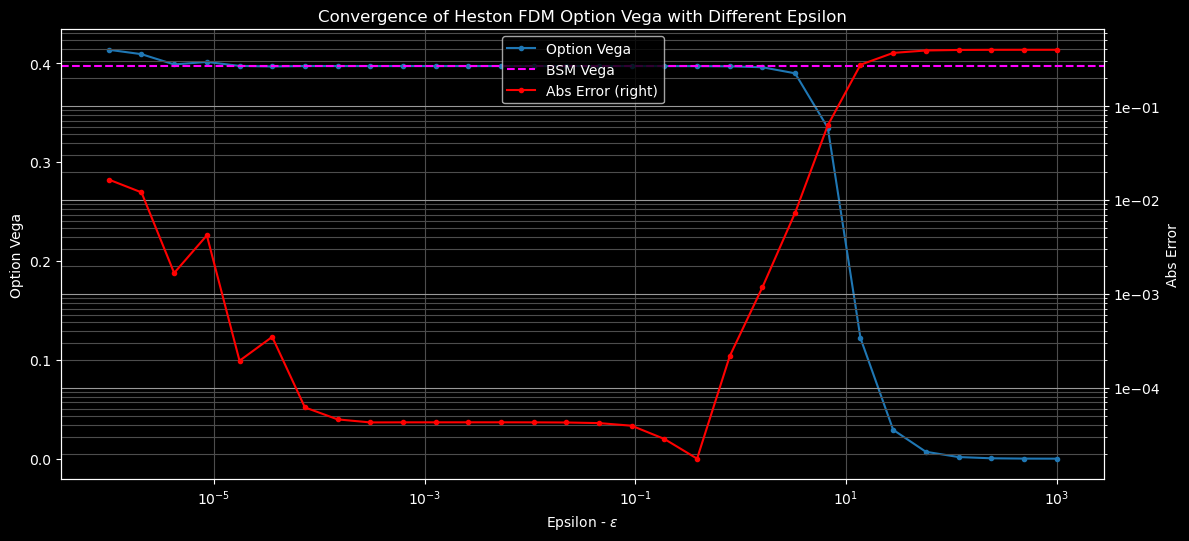

Minimum Vega Error: 


Option Vega  Vega Error
Epsilon                          
0.385662     0.396935    0.000018

In [10]:
# Parameters
S0 = 100
K = 100
T = 1
r = 0.00
q = 0.00
kappa = 20.0
theta = 0.04
sigma = 0.0001
v0 = 0.04
rho = 0.000
opt_type = 'p'
N_gridpoints = 110
FDM_500_price, FDM_500_delta, FDM_500_gamma  = Utils._American_Option_Heston(S0=S0, K=K, T=T, r=r, q=q, v0=v0, 
                                                                             kappa=kappa, theta=theta, volvol=sigma, rho=rho, N_gridpoints=N_gridpoints, exercise='American')

BS_price, BS_delta, BS_gamma, BS_vega = Utils.bs_put(iv=np.array(np.sqrt(v0)), ttm=np.array(T*252), S=np.array(S0), K=np.array(K), r=np.array(r), q=np.array(q))
print(f'BSM Vega: {BS_vega:.6f}')

# linspace of eps
eps_values = np.logspace(np.log10(1e-6), np.log10(1e3), 30)
vega_values = []

for eps_iv in tqdm(eps_values, leave=False):
    # Calculate the price with perturbed v0
    vol_eps     = (np.sqrt(v0) * (eps_iv))**2
    theta_peps  = (np.sqrt(theta)   + vol_eps)**2
    v0_peps     = (np.sqrt(v0)      + vol_eps)**2
    FDM_500_price_pepsiv = Utils._American_Option_Heston(S0=S0, K=K, T=T, r=r, q=q, v0=v0_peps,
                                                    kappa=kappa, theta=theta_peps, volvol=sigma, rho=rho, N_gridpoints=N_gridpoints, Type='put', exercise='American')[0]
    
    vega = (1/100) * (FDM_500_price_pepsiv - FDM_500_price) / vol_eps
    vega_values.append(vega)

vega_values = np.array(vega_values)

# Calculate errors
vega_error = np.abs(vega_values - BS_vega)

def plot():
    # Plotting the convergence
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    # Plot Option Vega and BSM Vega on the primary y-axis
    line1, = ax.plot(eps_values, vega_values, marker='.', color='tab:blue', label='Option Vega')
    line2 = ax.axhline(y=BS_vega, color='magenta', linestyle='--', label='BSM Vega')
    ax.set_xlabel(r'Epsilon - $\epsilon$')
    ax.set_ylabel('Option Vega')
    ax.set_title('Convergence of Heston FDM Option Vega with Different Epsilon')
    ax.grid(True, which='both', axis='x', color='.3')

    # Create twin y-axis for Abs Error
    ax_right = ax.twinx()
    line3, = ax_right.plot(eps_values, vega_error, 'r-', marker='.', label='Abs Error')
    ax_right.set_ylabel('Abs Error')
    ax_right.set_yscale('log')

    # Configure grid for secondary y-axis
    ax_right.yaxis.set_major_locator(LogLocator())
    ax_right.yaxis.set_major_formatter(LogFormatter())
    ax_right.grid(True, which='both', axis='y', color='.3')
    ax_right.grid(True, which='major', axis='y', color='.6')

    # Remove individual legends
    # ax.legend(loc='upper left')  # Removed
    # ax_right.legend(loc='upper right')  # Removed

    # Collect handles and labels from both axes
    handles_primary, labels_primary = ax.get_legend_handles_labels()
    handles_secondary, labels_secondary = ax_right.get_legend_handles_labels()

    # Append "(right)" to secondary labels
    labels_secondary = [f"{label} (right)" for label in labels_secondary]

    # Combine handles and labels
    handles = handles_primary + handles_secondary
    labels = labels_primary + labels_secondary

    # Create unified legend at the upper center
    ax_right.legend(handles, labels, loc='upper center')

    # Set x-axis to logarithmic scale
    plt.xscale('log')

    # Adjust layout to accommodate the unified legend
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust as needed

    # Display the plot
    plt.show()
    
plot()
results_df = pd.DataFrame({
    'Option Vega': vega_values,
    'Vega Error': vega_error
}, index=pd.Series(eps_values, name='Epsilon'))
print("Minimum Vega Error: ")
results_df.loc[[results_df['Vega Error'].idxmin()]]

## **Validation of utilsAlexander.py - Price and Greeks over different Stike Prices**

Average Percentage Errors - Price: 292.347239%, Delta: 0.000000%, Gamma: 124.428736%, Vega: 323.633866%


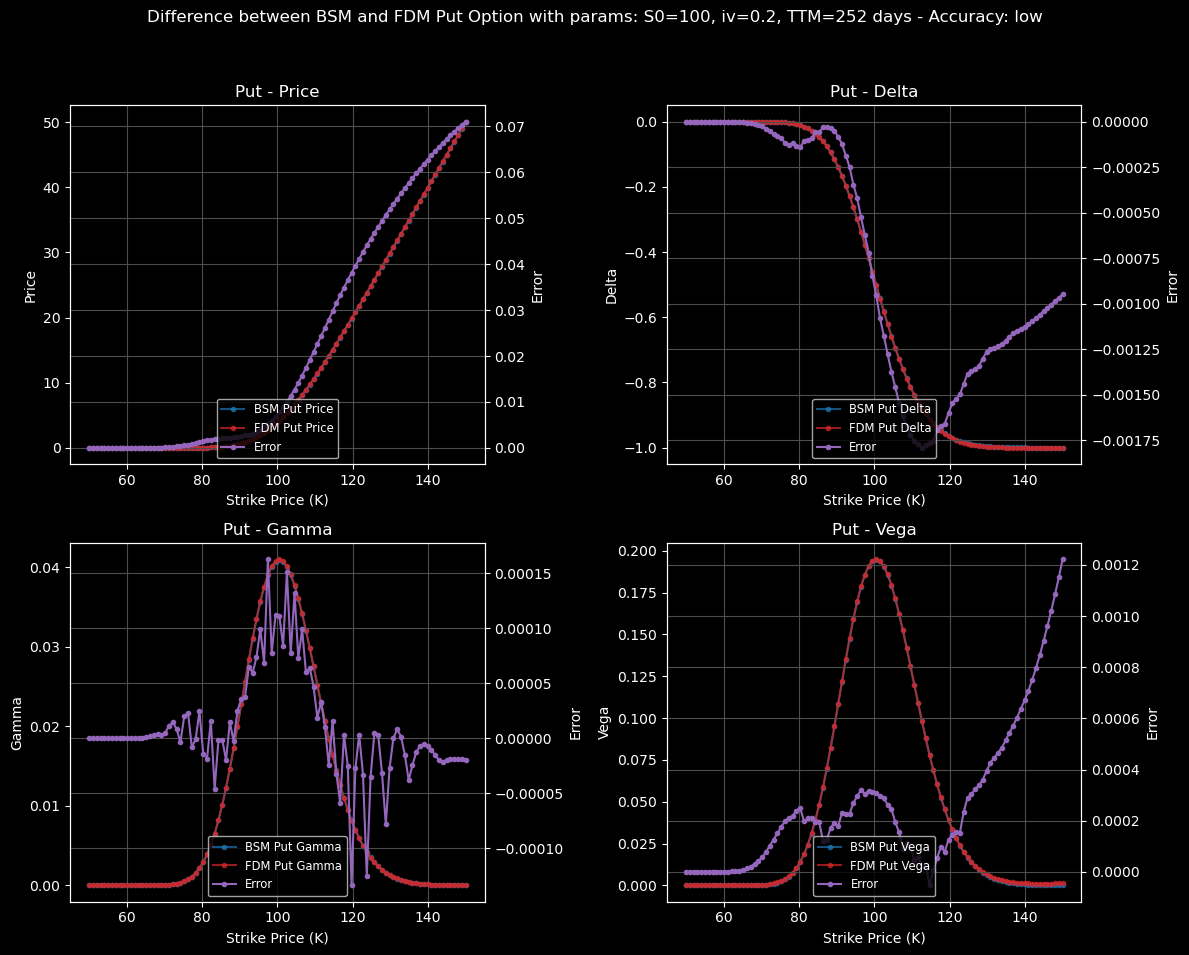

In [7]:
import importlib
import environment.utilsAlexander
importlib.reload(environment.utilsAlexander)
from environment.utilsAlexander import Utils
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import ticker for formatting
plt.style.use('dark_background')
import numpy as np

# Initialize Utils with FFT-based numerical method
utils = Utils(
    # Liability Portfolio Parameters
    S0=100., K=100., init_ttm=60, r=0.00, q=0.00, spread=0.0,
    ttms=[252], poisson_rate=1.0, 
    
    # Hedging Portfolio Parameters
    hed_ttm=180, hed_type='European',

    # init_vol is for both GBM and Heston
    init_vol=0.2,
    # Heston, Model Parameters
    kappa=20.0, theta=0.04, volvol=0.0001, rho=0.000,
    
    # Simulation Parameters
    stochastic_process='Heston',  
    time_to_simulate=60, num_sim=4092, frq=1,
    numerical_accuracy="low", n_jobs=8, np_seed=1234,

    # RL Environment Parameters
    action_low=0, action_high=3,
)

Ks = np.linspace(50, 150, 100, dtype=float)[:, None]  # Adjust range as needed
Ss = np.full_like(Ks, utils.S0)
ivs = np.full_like(Ks, utils.init_vol)
init_ttm = np.full_like(Ks, utils.init_ttm)

# BSM Put
fft_price, fft_delta, fft_gamma, fft_vega = utils.European_put_option     (iv=ivs, ttms=init_ttm, S0=Ss, K=Ks, T=252, stochastic_process='GBM')

# FDM-based Put
fdm_price, fdm_delta, fdm_gamma, fdm_vega = utils.American_put_option (iv=ivs, ttms=init_ttm, S0=Ss, K=Ks, T=252, stochastic_process='Heston')

def plot():
    """Plots BSM vs. FDM Put Option metrics with Percentage Error."""
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plot_data = [
        (fft_price, fdm_price, 'Price'),
        (fft_delta, fdm_delta, 'Delta'),
        (fft_gamma, fdm_gamma, 'Gamma'),
        (fft_vega,  fdm_vega,  'Vega')
    ]

    for ax, (analytical, numerical, label) in zip(axs.flatten(), plot_data):
        ax.plot(Ks, analytical, label=f'BSM Put {label}', color='tab:blue', marker='.', zorder=101, alpha=0.7)
        ax.plot(Ks, numerical, label=f'FDM Put {label}', linestyle='-', color='tab:red', marker='.', zorder=101, alpha=0.7)

        # Calculate Percentage Error
        error = ((numerical.flatten() - analytical.flatten()))

        # Secondary y-axis for Percentage Error
        ax2 = ax.twinx()
        ax2.plot(Ks, error, label='Error', color='tab:purple', marker='.', linestyle='-', zorder=102)
        ax2.set_ylabel('Error')

        # Format y-axis
        formatter = ticker.ScalarFormatter(useMathText=False)
        formatter.set_scientific(False)
        formatter.set_useOffset(False)
        ax2.yaxis.set_major_formatter(formatter)
        # ax2.set_ylim([-20, 20])
        ax2.grid(True, which='major', axis='y', color='.3')

        # Combine legends
        lines_1, labels_1 = ax.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower center', fontsize='small').set_zorder(103)

        ax.set_title(f'Put - {label}', fontsize=12)
        ax.set_xlabel('Strike Price (K)', fontsize=10)
        ax.set_ylabel(label, fontsize=10)
        ax.grid(True, which='both', axis='x', color='.3', zorder=100)

    fig.suptitle(
        f'Difference between BSM and FDM Put Option with params: S0={int(utils.S0)}, iv={utils.init_vol}, '
        f'TTM=252 days - Accuracy: {utils.numerical_accuracy}', fontsize=12
    )
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def calculate_average_errors():
    """Calculates and prints the average percentage errors for Price, Delta, Gamma, and Vega."""
    avg_price_error = np.where(fft_price > 0 , ((fdm_price - fft_price) / fft_price) * 100 , 0)
    avg_delta_error = np.where(fft_delta > 0 , ((fdm_delta - fft_delta) / fft_delta) * 100 , 0)
    avg_gamma_error = np.where(fft_gamma > 0 , ((fdm_gamma - fft_gamma) / fft_gamma) * 100 , 0)
    avg_vega_error  = np.where(fft_vega  > 0 , ((fdm_vega - fft_vega) / fft_vega) * 100    , 0)
    print(
        f'Average Percentage Errors - Price: {avg_price_error.mean():.6f}%, '
        f'Delta: {avg_delta_error.mean():.6f}%, '
        f'Gamma: {avg_gamma_error.mean():.6f}%, '
        f'Vega: {avg_vega_error.mean():.6f}%'
    )

calculate_average_errors()
plot()

----------------------------------------
# (FFT.q vs FDM) Equality bettween FDM and FFT.q

Average Percentage Errors - Price: 10.904227%, Delta: 0.000000%, Gamma: -186.350802%, Vega: 2123.072293%


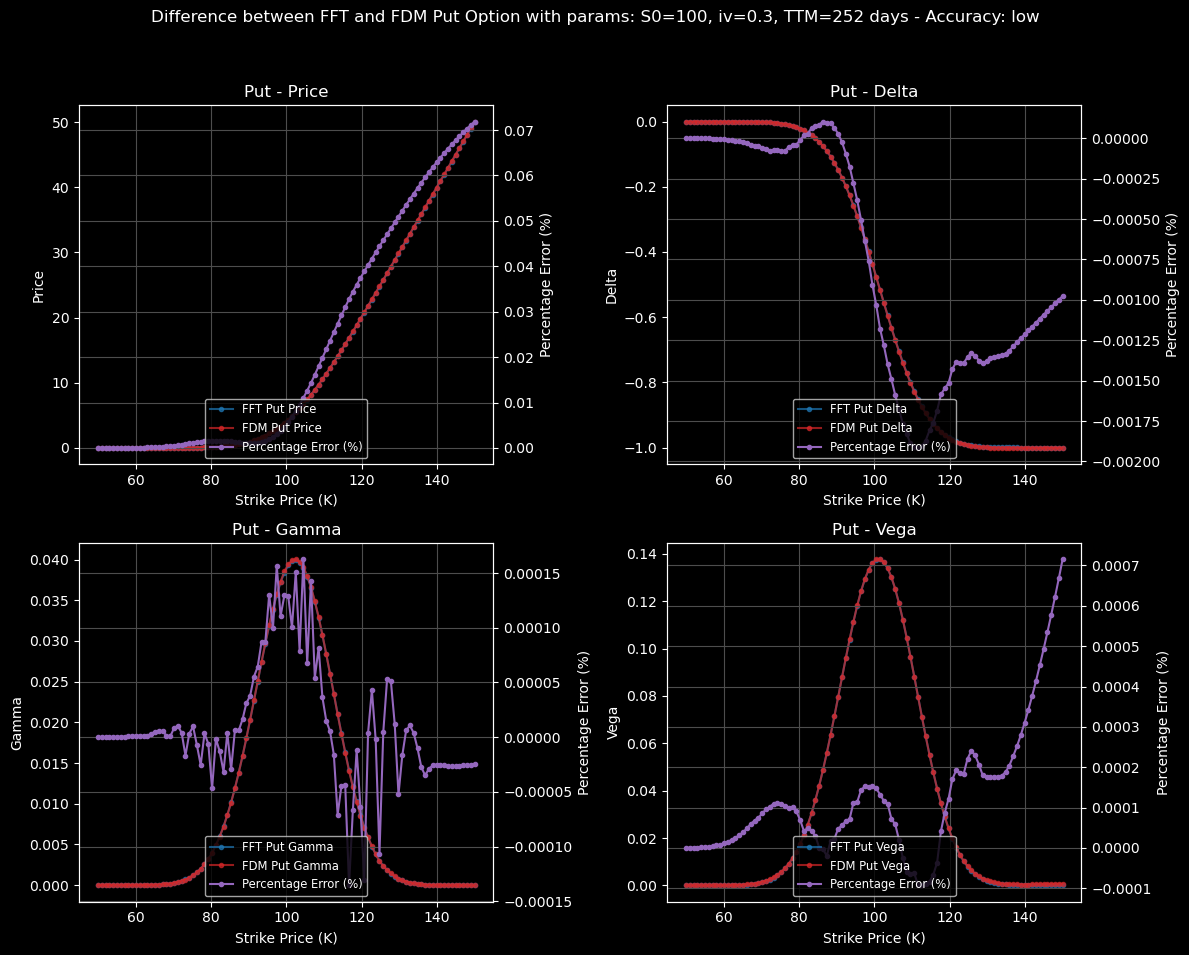

In [8]:
import importlib
import environment.utilsAlexander
importlib.reload(environment.utilsAlexander)
from environment.utilsAlexander import Utils
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import ticker for formatting
plt.style.use('dark_background')
import numpy as np

# Initialize Utils with FFT-based numerical method
utils = Utils(
    # Liability Portfolio Parameters
    S0=100., K=100., init_ttm=30
    , r=0.00, q=0.00, spread=0.0,
    ttms=[252], poisson_rate=1.0, 
    
    # Hedging Portfolio Parameters
    hed_ttm=180, hed_type='European',

    # init_vol is for both GBM and Heston
    init_vol=0.3,
    # Heston, Model Parameters
    kappa=1.0, theta=0.09, volvol=0.3, rho=-0.7,
    
    # Simulation Parameters
    stochastic_process='Heston',  
    time_to_simulate=60, num_sim=4092, frq=1,
    numerical_accuracy="low", n_jobs=8, np_seed=1234,

    # RL Environment Parameters
    action_low=0, action_high=3,
)

Ks = np.linspace(50, 150, 100, dtype=float)[:, None]  # Adjust range as needed
Ss = np.full_like(Ks, utils.S0)
ivs = np.full_like(Ks, utils.init_vol)
init_ttm = np.full_like(Ks, utils.init_ttm)

# FFT Put
fft_price, fft_delta, fft_gamma, fft_vega       = utils.European_put_option  (iv=ivs, ttms=init_ttm, S0=Ss, K=Ks, T=252, stochastic_process='Heston')

# FDM-based Put
fdm_price, fdm_delta, fdm_gamma, fdm_vega   = utils.American_put_option (iv=ivs, ttms=init_ttm, S0=Ss, K=Ks, T=252, stochastic_process='Heston')

def plot():
    """Plots FFT vs. FDM Put Option metrics with Percentage Error."""
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plot_data = [
        (fft_price, fdm_price, 'Price'),
        (fft_delta, fdm_delta, 'Delta'),
        (fft_gamma, fdm_gamma, 'Gamma'),
        (fft_vega,  fdm_vega,  'Vega')
    ]

    for ax, (analytical, numerical, label) in zip(axs.flatten(), plot_data):
        ax.plot(Ks, analytical, label=f'FFT Put {label}', color='tab:blue', marker='.', zorder=101, alpha=0.7)
        ax.plot(Ks, numerical, label=f'FDM Put {label}', linestyle='-', color='tab:red', marker='.', zorder=101, alpha=0.7)

        # Calculate Percentage Error
        error = ((numerical.flatten() - analytical.flatten()) / analytical.flatten()) * 100
        error = ((numerical.flatten() - analytical.flatten()))# / analytical.flatten()) * 100
                 
        # Secondary y-axis for Percentage Error
        ax2 = ax.twinx()
        ax2.plot(Ks, error, label='Percentage Error (%)', color='tab:purple', marker='.', linestyle='-', zorder=102)
        ax2.set_ylabel('Percentage Error (%)')

        # Format y-axis
        formatter = ticker.ScalarFormatter(useMathText=False)
        formatter.set_scientific(False)
        formatter.set_useOffset(False)
        ax2.yaxis.set_major_formatter(formatter)
        # ax2.set_ylim([-20, 20])
        ax2.grid(True, which='major', axis='y', color='.3')

        # Combine legends
        lines_1, labels_1 = ax.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower center', fontsize='small').set_zorder(103)

        ax.set_title(f'Put - {label}', fontsize=12)
        ax.set_xlabel('Strike Price (K)', fontsize=10)
        ax.set_ylabel(label, fontsize=10)
        ax.grid(True, which='both', axis='x', color='.3', zorder=100)

    fig.suptitle(
        f'Difference between FFT and FDM Put Option with params: S0={int(utils.S0)}, iv={utils.init_vol}, '
        f'TTM=252 days - Accuracy: {utils.numerical_accuracy}', fontsize=12
    )
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def calculate_average_errors():
    """Calculates and prints the average percentage errors for Price, Delta, Gamma, and Vega."""
    avg_price_error = np.where(fft_price > 0 , ((fdm_price - fft_price) / fft_price) * 100 , 0)
    avg_delta_error = np.where(fft_delta > 0 , ((fdm_delta - fft_delta) / fft_delta) * 100 , 0)
    avg_gamma_error = np.where(fft_gamma > 0 , ((fdm_gamma - fft_gamma) / fft_gamma) * 100 , 0)
    avg_vega_error  = np.where(fft_vega  > 0 , ((fdm_vega - fft_vega) / fft_vega) * 100    , 0)
    print(
        f'Average Percentage Errors - Price: {avg_price_error.mean():.6f}%, '
        f'Delta: {avg_delta_error.mean():.6f}%, '
        f'Gamma: {avg_gamma_error.mean():.6f}%, '
        f'Vega: {avg_vega_error.mean():.6f}%'
    )

calculate_average_errors()
plot()